In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
price = pd.read_csv("Real estate.csv")
price.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#copying the original data
data = price.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
pd.set_option('display.max_rows', data.shape[0]+1)

In [5]:
#renaming size variable since pandas has same default name
data.rename(columns={'size':'no_bedroom'},inplace=True)

In [6]:
#checking number of unique values
data.nunique()

area_type          4
availability      81
location        1305
no_bedroom        31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [7]:
#checking the null values
data.isna().sum()

area_type          0
availability       0
location           1
no_bedroom        16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

There are many missing values

In [8]:
#location has only one missing value which is fiiled with mode value
data.location.fillna(data.location.value_counts().index[0],axis=0,inplace=True)

C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


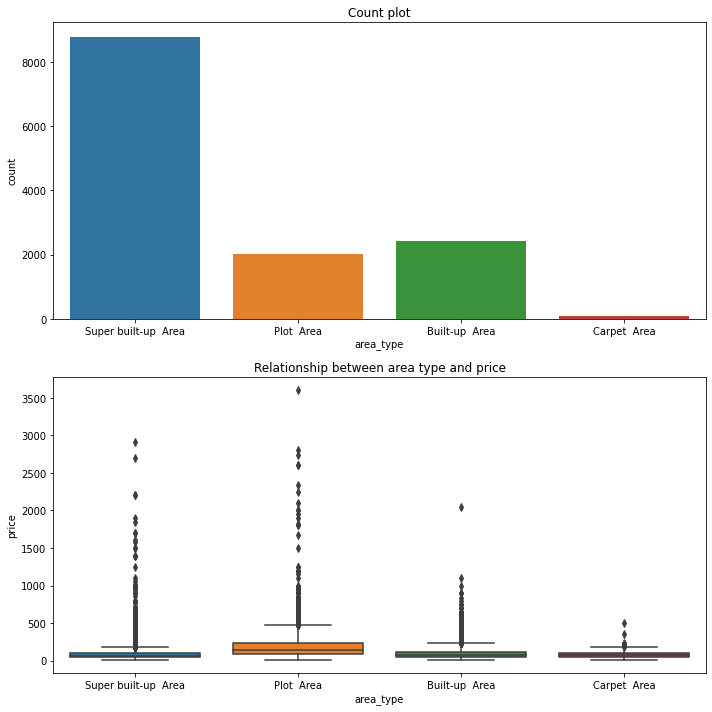

In [9]:
#Visualization for variable area_type
fig, axes = plt.subplots(2,1,figsize=(10,10),tight_layout=True)
axes[0].set_title('Count plot')
sns.countplot(data.area_type,ax=axes[0])

axes[1].set_title('Relationship between area type and price')
sns.boxplot(x=data.area_type,y=data.price,ax=axes[1])
plt.show()

In [10]:
#Analysis for variable availability
pd.crosstab(data.availability,'count').sort_index().tail()

col_0,count
availability,
22-Mar,3
22-May,10
22-Nov,2
Immediate Possession,16
Ready To Move,10581


Since 'Ready To Move' class in availability dominate other classes in the variable. Hence this variable is dropped.

In [11]:
#checking dummy values in location variable
d = pd.DataFrame(pd.unique(data.location),columns=['location'])
x=[]
for i in d.location:
    if(i[0].isdigit() == True):
        x.append(i)
x

['7th Phase JP Nagar',
 '8th Phase JP Nagar',
 '8th block Koramangala',
 '1st Block Jayanagar',
 '9th Phase JP Nagar',
 '6th Phase JP Nagar',
 '5th Phase JP Nagar',
 '1 Giri Nagar',
 '2nd Stage Nagarbhavi',
 '3rd Block Hrbr Layout',
 '7th Block Jayanagar',
 '2nd Phase JP Nagar',
 '6th block banashankari 3rd stage, 100 feet ORR',
 '4 Bedroom Farm House in Bagalur',
 '1st Phase JP Nagar',
 '2nd Block Hrbr Layout',
 '5th Block Hbr Layout',
 '2nd Phase Judicial Layout',
 '1st Block HRBR Layout',
 '9th Block Jayanagar',
 '3rd Block Jayanagar',
 '2Electronic City Phase II',
 '3rd Block Banashankari',
 '1 Ramamurthy Nagar',
 '5th Stage BEML Layout',
 '4th Block Koramangala',
 '3rd Block HBR Layout',
 '1st Block Koramangala',
 '5th block Koramangala',
 '1st Stage Indira Nagar',
 '4th T block Jayanagar',
 '1Hanuman Nagar',
 '6th Block Rajaji Nagar',
 '1st Stage Domlur',
 '1 Annasandrapalya',
 '6th block Koramangala',
 '4th Block Jayanagar',
 '1st Stage Radha Krishna Layout',
 '1Channasandra',
 

From the above list, it is observed that many names are starting with number that has to be replaced. Eg: '1 Giri Nagar' to 'Girinagar'

In [12]:
data.location.nunique()

1305

In [13]:
#checking unique values for location variable
np.set_printoptions(threshold=np.inf)
pd.unique(data.location)

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'Gandhi Bazar',
       '7th Phase JP Nagar', 'Gottigere', 'Sarjapur', 'Mysore Road',
       'Bisuvanahalli', 'Raja Rajeshwari Nagar', 'Ramakrishnappa Layout',
       'Manayata Tech Park', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', ' Thanisandra', 'Mangammanapalya', 'Electronic City',
       'Ramagondanahalli', 'Yelahanka', 'Hebbal', 'Kasturi Nagar',
       'Kanakpura Road', 'Electronics City Phase 1', 'Kundalahalli',
       'Chikkalasandra', 'Murugeshpalya', 'Sarjapur  Road', 'Ganga Nagar',
       'HSR Layout', 'Doddathoguru', 'KR Puram', 'Himagiri Meadows',
       'Adarsh Nagar', 'Bhoganhalli', 'Lakshminarayana Pura',
       'Begur Road', 'Devanahalli', 'Govindaraja Nagar Ward',
       'Tharabanahalli', 'Varthur', 'Bommanahalli', 'Gunjur',
       'Devarachikkanahalli', 'Double Road', 'He

In [14]:
#replacing with proper names
data.location.replace({'1 Giri Nagar':'Giri Nagar','1Hanuman Nagar':'Hanuman Nagar','1 Ramamurthy Nagar':'Ramamurthy Nagar',
                       '1Kasavanhalli':'Kasavanhalli','1Hoysalanagar':'Hoysalanagar','1 Immadihalli':'Immadihalli',
                       '1Channasandra':'Channasandra','2Electronic City Phase II':'Electronic City',
                       '1 Annasandrapalya':'Annasandrapalya','4 Bedroom Farm House in Bagalur':'Bagalur',
                       '5 Bedroom Farm House in Lakshmipura':'Lakshmipura','tc.palya':'t.c palya',
                       'manyata park':'manyata tech park','manyata':'manyata tech park','Yemlur, Old Airport Road, ':'Yemlur',
                       'Whietfield, ':'Whitefield','Whitefield, ':'Whitefield','Vinayak Nagar':'Vinayaka Nagar',
                       'whitefiled':'Whitefield','Anathanagar':'Ananth Nagar','BAGUR ROAD':'BAGUR','2 Bedroom Furnished Farm House in Kolar Road':'Kolar Road',
                       'Electronic City Phase 1, ':'Electronics City','Electronic city Phase 1, ':'Electronics City',
                       'Electronic city phase 1, ':'Electronics City','white field,kadugodi':'Whitefield'},inplace=True)

In [15]:
#checking the location which have spaces at the starting letters
o = []
for i in data.location:
    if(i[-1].isspace() == True):
        o.append(i)
np.unique(o)

array(['Banasawadi, ', 'Banaswadi, ', 'Bellandur, ',
       'ECC Road, Whitefield, ', 'HSR Layout 7th sector, ',
       'Haralur Road, ', 'Hoodi Circle, ', 'JP Nagar 7th Phase, ',
       'JP Nagar 8th Phase, ', 'JP nagar 9th Phase, ', 'Jayanagar, ',
       'Judicial Layout, Kanakapura Road, ', 'Kanakapura Road, ',
       'Kudlu Village, ', 'Near Electronic City, ', 'Off Sarjapur Road, ',
       'Off Sarjapur road, ', 'Panathur Road, ', 'Sarjapur Road, ',
       'Thanisandra Main Road, ', 'Varthur Road, '], dtype='<U34')

In [16]:
data.location.replace({' Anekal':'Anekal',' Banaswadi':'Banaswadi',' Basavangudi':'Basavangudi',' Bhoganhalli':'Bhoganhalli',
                       ' Devarabeesana Halli':'Devarabeesana Halli',' Devarachikkanahalli':'Devarachikkanahalli',
                       ' Electronic City':'Electronic City',' Mysore Highway':'Mysore Highway',' Rachenahalli':'Rachenahalli',
                       ' Sector 1 HSR Layout':'HSR Layout',' Thanisandra':'Thanisandra',' Whitefield':'Whitefield',
                       ' ittamadu':'ittamadu',' south':'south','2nd Phase Judicial Layout':'Judicial Layout'},inplace=True)

In [17]:
#Replacing with proper names
data.location.replace({'7th Phase JP Nagar':'JP Nagar','8th Phase JP Nagar':'JP Nagar','9th Phase JP Nagar':'JP Nagar',
                       '6th Phase JP Nagar':'JP Nagar','5th Phase JP Nagar':'JP Nagar','8th block Koramangala':'Koramangala',
                       '1st Block Jayanagar':'Jayanagar','2nd Stage Nagarbhavi':'Nagarbhavi','3rd Block Hrbr Layout':'HRBR Layout',
                       '7th Block Jayanagar':'Jayanagar','2nd Phase JP Nagar':'JP Nagar','1st Phase JP Nagar':'JP Nagar',
                       '6th block banashankari 3rd stage, 100 feet ORR':'Banashankari','2nd Block Hrbr Layout':'HRBR Layout',
                       '5th Block Hbr Layout':'HRBR Layout','9th Block Jayanagar':'Jayanagar','3rd Block Jayanagar':'Jayanagar',
                       '3rd Block Banashankari':'Banashankari','5th Stage BEML Layout':'BEML Layout','4th Block Koramangala':'Koramangala',
                       '3rd Block HBR Layout':'HBR Layout','1st Block Koramangala':'Koramangala','5th block Koramangala':'Koramangala',
                       '1st Stage Indira Nagar':'Indira Nagar','4th T block Jayanagar':'Jayanagar','6th Block Rajaji Nagar':'Rajaji Nagar',
                       '1st Stage Domlur':'Domlur','6th block Koramangala':'Koramangala','4th Block Jayanagar':'Jayanagar',
                       '1st Stage Radha Krishna Layout':'Radha Krishna Layout','4th Phase JP Nagar':'JP Nagar','2nd Block Jayanagar':'Jayanagar',
                       '3rd Phase JP Nagar':'JP Nagar','8th Block Jayanagar':'Jayanagar','1st Block BEL Layout':'BEL Layout','3rd Block Koramangala':'Koramangala',
                       '1A Block Koramangala':'Koramangala','2nd Block Koramangala':'Koramangala','5 Bedroom Farm House in Lakshmipura':'Lakshmipura','2nd Stage Arekere Mico Layout':'Arekere',
                       '1st Block HBR Layout':'HBR Layout','2nd Block Bel Layout':'BEL Layout','2nd phase jp nagar, jp nagar':'JP Nagar','6th Block Jayanagar':'Jayanagar',
                       '3rd Phase Iti Layout':'ITI Layout','5th Block Jayanagar':'Jayanagar','1st Block HRBR Layout':'HRBR Layout',
                       '2nd Block Hbr Layout':'HBR Layout','7th Block Koramangala':'Koramangala','4th Block HBR Layout':'HBR Layout',
                       '3rd Stage Raja Rajeshwari Nagar':'RR Nagar','12th cross srinivas nagar banshankari 3rd stage':'Banashankari'
                      },inplace=True)

In [18]:
data.location.replace({'A Narayanapura':'Narayanapura','AECS LAYOUT A-BLOCK Singasandra':'AECS Layout','Akshayanagara East':'Akshaya Nagar','Akshayanagara West':'Akshaya Nagar',
                       'Akshya Nagar':'Akshaya Nagar','Amruthnagar':'Amrita Nagar','Anand nagar':'Anand Nagar','Anandapura':'Anantapura',
                       'Ananthanagar Phase 1,Electronic City , phase 2':'Ananth Nagar','Ananthapura, T C palaya Main Road':'Anantapura',
                       'Anekal - Hosur Road':'Anekal','Annapoorneshwari Layout, JP nagar 7th phase':'JP Nagar','Ashwathnagar':'Ashwath Nagar',
                       'B Channasandra':'Channasandra','B Narayanapura':'Narayanapura','BAGUR':'Bagur','BEML Layout 5th Stage':'BEML Layout',
                       'BEML Layout 5th stage':'BEML Layout','BTM 1st Stage':'BTM Layout','BTM 2nd Stage':'BTM Layout','BTM 4th Stage':'BTM Layout',
                       'BTM Layout 1stage 9th Main':'BTM Layout','BTM Layout 2nd Stage 1st Phase':'BTM Layout','Bagalur Main Road':'Bagalur',
                       'Banagirinagar':'Banagiri Nagar','Banasawadi, ':'Banaswadi','Banashankari':'Banashankari','Banashankari 2 nd Stage':'Banashankari',
                       'Banashankari 2nd Stage':'Banashankari','Banashankari 3rd stage, Vivekanandanagar':'Banashankari','Banashankari 6th Stage':'Banashankari',
                       'Banashankari 6th Stage ,Subramanyapura':'Banashankari','Banashankari 6th stage , 2nd block':'Banashankari','Banashankari Stage I':'Banashankari',
                       'Banashankari Stage II':'Banashankari','Banashankari Stage III':'Banashankari','Banashankari Stage V':'Banashankari',
                       'Banashankari Stage VI':'Banashankari','Banashankari stage 2':'Banashankari','Banashankari3rd stage bigbazar':'Banashankari','Banaswadi, ':'Banaswadi',
                       'Bapuji Layout':'Bapuji Nagar','Basavanagara':'Basava Nagar','Basavanna Nagar':'Basava Nagar','Basaveshwara Nagar Yelahanka':'Basaveshwara Nagar',
                       'Basaveswarnagar':'Basaveshwara Nagar','Basnashankari,6th stage,':'Banashankari','Basvasamithi Layout Vidyaranyapura':'Vidyaranyapura',
                       'Begur Road':'Begur','Belathur':'Bellandur','Belatur':'Bellandur','Bellandur, ':'Bellandur','Beml layout, Rajarajeshwari nagar':'BEML Layout',
                       'Bendiganahalli':'Bennigana Halli','Bharath Housing Society Layout':'Bharat Nagar','Bharathnagar':'Bharat Nagar','Bhuvaneswari Nagar':'Bhuvaneshwari Nagar',
                       'Byrasandra Extension':'Byrasandra','Bommasandra Industrial Area':'Bommasandra','Bommenahalli':'Bommanahalli','Brindavan Layout':'Brindavan Nagar'},inplace=True)

In [19]:
data.location.replace({'CHIKKATIRUPATHI':'Chikkatirupathi','CQAL LAYOUT C BLOCK':'CQAL Layout','Cambridge road':'Cambridge Layout',
                       'Canara Bank Colony':'Canara Bank Layout','Channasandra Layout':'Channasandra','Chellikere':'Chelekare',
                       'Chennammanakere Achukattu':'Chennammana Kere','Chikka Gowdanapalya.':'Chikka Gowdanapalya','Defence Colony':'Defence Layout',
                       'Devanahalli Int. Airport':'Devanahalli','Devanahalli Road':'Devanahalli','Devarabisanahalli':'Devarabeesana Halli','Doctor Layout Rayasandra':'Doctors Layout',
                       'Dodda Nekkundi Extension':'Dodda Nekkundi','Doddanakundi Industrial Area 2':'Doddanekundi','Dollar Scheme Colony':'Dollars Colony',
                       'Dollars Layout':'Dollars Colony','Domlur Layout':'Domlur','Dwarka Nagar':'Dwaraka Nagar',},inplace=True)

In [20]:
data.location.replace({'ECC Road, Whitefield, ':'Whitefield','EPIP AREA, WHITEFIELD':'Whitefield','Electronic City Phase II':'Electronic City',
                       'Electronics City':'Electronic City','Electronics City Phase 1':'Electronic City','Ex-Servicemen Colony Dinnur Main Road R.T.Nagar':'RT Nagar',
                       'Fraser town':'Frazer Town','Ganga Nagar Extension':'Ganga Nagar','Gkvk Layout':'GKVK Layout','Gokaula Extension':'Gokula Extension',
                       'Govindaraja Nagar Ward':'Govindraja Nagar','HAL 2nd Stage':'HAL Layout','HAL 3rd Stage':'HAL Layout','HOSUR MAIN ROAD':'Hosur Main Road',
                       'HOSUR RMAIN ROAD':'Hosur Main Road','HSR Layout 7th sector, ':'HSR Layout','Hanuman Nagar':'Hanumanth Nagar','Hanumantha Nagar':'Hanumanth Nagar',
                       'Haralur Road, ':'Harlur','Haralur Road':'Harlur','Hebbal Kempapura':'Hebbal','Hennur Bande':'Hennur','Hennur Busstop':'Hennur','Hennur Gardens':'Hennur',
                       'Hennur Road':'Hennur','Hoodi Circle, ':'Hoodi','Hoodi Layout':'Hoodi','Horamavu Banaswadi':'Horamavu','Horamavu Agara':'Horamavu','Hormavu':'Horamavu',
                       'Hosahalli Extension':'Hosahalli','Hoskote near':'Hoskote','Housing Board Layout Vijay Nagar':'Vijay Nagar','Hsr layout sector3':'HSR Layout'},inplace=True)

In [21]:
data.location.replace({'ITI Employees Layout':'ITI Layout','Iti Layout':'ITI Layout','Indira Nagar 3rd Stage':'Indira Nagar','Indira Nagar Stage 2':'Indira Nagar',
                       'Indiranagar HAL 2nd Stage':'Indira Nagar','Indra Nagar':'Indira Nagar','Indranagar  100ft road defence colony':'Indira Nagar',
                       'J P Nagar 7th Phase Ramayya City':'JP Nagar','J.P.nagar 6th Phase.Sarakki Nagar':'JP Nagar','JP Nagar 7th Phase, ':'JP Nagar',
                       'JP Nagar 8th Phase, ':'JP Nagar','JP nagar 9th Phase, ':'JP Nagar','Jakkasandra Extension':'Jakkasandra','Jakkur Plantation':'Jakkur',
                       'JakkurYelahanka':'Jakkur','Jakkuru Layout':'Jakkur','Jalahalli East':'Jalahalli','Jalahalli West':'Jalahalli','Jaraganahalli Jp Nagar Post':'JP Nagar',
                       'Jay an agar 4 T Block':'Jayanagar','Jaya Nagar East':'Jayanagar','Jaya Mahal layout':'Jayamahal','Jayamahal Extension':'Jayamahal',
                       'Jayanagar, ':'Jayanagar','Jaymahal Road':'Jayamahal','Jp nagar 8th Phase .':'JP Nagar','Judicial Layout, Kanakapura Road, ':'Judicial Layout'},inplace=True)

In [22]:
data.location.replace({'K G Colony':'KG Halli','K R C kothanur':'Kothanur','KAMAKIYA':'Kamakya','KHB Colony Extension':'KEB Colony','KUDLU MAIN ROAD':'Kudlu Main Road','Kalkere Channasandra':'Kalkere',
                       'Kamakya Layout':'Kamakya','Kanakapur main road':'Kanakapura Main Road','Kanakapura  Rod':'Kanakapura Main Road','Kanakapura Road':'Kanakapura Main Road',
                       'Kanakapura Road, ':'Kanakapura Main Road','Kanakapura main  Road':'Kanakapura Main Road','kanakapura main road':'Kanakapura Main Road','Kanakpura Road':'Kanakapura Main Road','Kasthuri Nagar East Of NGEF':'Kasthuri Nagar',
                       'Kathreguppe':'Kathriguppe','Kathriguppe IV Phase':'Kathriguppe','Kenchanehalli R R Nagar':'RR Nagar','Kenchenhalli':'Kenchenahalli','Kengeri Hobli':'Kengeri',
                       'Kengeri Satellite Town':'Kengeri','Kengeri Satellite Town ( BDA SITE)':'Kengeri','Kengeri Satellite Town KHB Apartment':'Kengeri','Kengeri Satellite Town Stage II':'Kengeri',
                       'Kirloskar layout, Basaveshwarnagar':'Kirloskar Layout','Kodigehaali':'Kodigehalli','Konanakunte Cross':'Konanakunte','Koramangala Industrial Layout':'Koramangala',
                       'Kothannur':'Kothanur','Kothnoor Dinne':'Kothanur','Kothnur Narayanapura':'Kothanur','Kudlu Village, ':'Kudlu','Kumbhena Agrahara':'Kumbena Agrahara',
                       'Kundalahalli Colony':'Kundalahalli'},inplace=True)

In [23]:
data.location.replace({'Lakkasandra Extension':'Lakkasandra','Lakshminarayanapura, Electronic City Phase 2':'Lakshminarayana Pura',
                       'Lakshmipura Vidyaanyapura':'Lakshmipura','Langford Gardens':'Langford Town','M.G Road':'MG Road','Mahalakshmi Puram':'Mahalakshmi Layout',
                       'Manonarayanapalya':'Manorayana Palya','Maragondana Halli, kr puram, old madras road':'Maragondanahalli','Marathalli bridge':'Marathahalli',
                       'Maruthi Extension':'Maruthi Nagar','Maruthi HBCS Layout':'Maruthi Nagar','Maruthi Layout':'Maruthi Nagar','Maruthi nagar kogilu':'Maruthi Nagar',
                       'Mathikere Extension':'Mathikere','Mathikere SBM colony':'Mathikere','Medaralli':'Medahalli','Mysore Highway':'Mysore Road'},inplace=True)

In [24]:
data.location.replace({'Nagarbhavi BDA Complex':'Nagarbhavi','Nagarbhavi Garden Villas Layout':'Nagarbhavi','Nanjappa Garden':'Nanjappa Layout',
                       'Nanjappa Layout Vidyaranyapura':'Nanjappa Layout','Narayana Nagar 1st Block':'Narayana Nagar','Near Electronic City, ':'Electronic City',
                       'Neelamangala':'Nelamangala','New Thippasandra':'Thippasandra','OLd Gurappanapalya':'Gurappanapalya','Off Bannergatta road':'Off Bannergatta Road',
                       'Off Sarjapur Road, ':'Off Sarjapur Road','Off Sarjapur road, ':'Off Sarjapur Road','Outer Ring Road East':'Outer Ring Road','P&T Colony':'P&T Layout',
                       'Pai layout , Mahadevapura':'Pai Layout','Panathur Road,':'Panathur','Phase 1 Kammasandra':'Kammasandra','Poornapragna Housing Society Layout':'Poorna Pragna Layout',
                       'Prasanth Extension':'Prashanth Nagar','Pulikeshi Nagar':'Pulkeshi Nagar','R.T. Nagar':'RT Nagar','RK Layout 2nd Stage':'RK Colony',
                       'RMV 2nd Stage':'RMV','RMV Extension':'RMV','RMV Extension Stage 2':'RMV','RMV extension stage 2, rmv extension':'RMV','RR Layout':'RR Nagar',
                       'Raghavendra Layout':'Raghavendra Nagar','Raja Rajashweri Nagar':'RR Nagar','Raja Rajeshwari Nagar':'RR Nagar','Raja Rajeshwari Nagar 5th Stage':'RR Nagar',
                       'Raja Rajeshwari Nagara':'RR Nagar','Rajarajesheari nagar':'RR Nagar','Rajarajeshwari Nagara':'RR Nagar','Rajarajeshwari nagar':'RR Nagar',
                       'Rajarajeshwari nagar':'RR Nagar','Rajarajeshwarinagar':'RR Nagar','Rajiv Nagar':'Rajiv Gandhi Nagar','Ramamurthy Nagar Extension':'Ramamurthy Nagar',
                       'Ramanagara Channapatna':'Ramanagara','Reliaable Tranquil Layout':'Reliaable Layout','Reliable Woods Layout':'Reliaable Layout','Richmond Road':'Richmond Town',
                       'Ring Road Nagarbhavi':'Nagarbhavi',},inplace=True)

In [25]:
data.location.replace({'SARJAPUR BAGALUR ROAD':'Sarjapur Road','SHANTHINAGAR':'Shanti Nagar','SRINIVASAPURA':'Srinivasa Nagar','Sarjapur  Road':'Sarjapur Road','Sampangirama Nagar':'Sampang Rama Nagar',
                       'Sampige Layout':'Sampigehalli','Sarjapur Road, ':'Sarjapur Road','Sarjapura - Attibele Road':'Sarjapur Road','Sarvobhogam Nagar':'Sarvabhouma Nagar',
                       'Satyasaibaba Layout':'Sathya Sai Layout','Sathya Layout':'Sathya Sai Layout','Sector 1 HSR Layout':'HSR Layout','Sector 2 HSR Layout':'HSR Layout',
                       'Sector 3 HSR Layout':'HSR Layout','Sector 4 HSR Layout':'HSR Layout','Sector 6 HSR Layout':'HSR Layout','Sector 7 HSR Layout':'HSR Layout',
                       'Shirdi Sai Layout':'Shirdi Sai Nagar','Shivanagar':'Shivaji Nagar','Sir M V Nagar':'SMV Nagar','SMV layout':'SMV Nagar','Sree Narayana Nagar':'Narayana Nagar',
                       'Sri Sai Layout':'Shirdi Sai Nagar','Srinivas Colony':'Srinivasa Nagar','Srirampuram':'Srirampura','Stage-4 Bommanahalli':'Bommanahalli',
                       'Subash Nagar':'Subhash Nagar','Subramanyanagar':'Subramanya Nagar','Sundar Ram Shetty Nagar':'Sundara Nagar','Sunder Ram Shetty Nagar':'Sundara Nagar',
                       'T C Palya main Road':'TC Palya','T Dasarahalli':'Dasarahalli',},inplace=True)

In [26]:
data.location.replace({'T c palya':'TC Palya','T.C PALYA':'TC Palya','T.C. Palya':'TC Palya','TC Palaya':'TC Palya','TR Mill Road, Chamarajpet':'T R Mill Road',
                       'Thanisandra Main Road, ':'Thanisandra','Thanisandra main road':'Thanisandra','Thyagraj Nagar':'Thyagaraja Nagar','Udaya Nagar':'Uday Nagar',
                       'V.V Puram':'VV Puram','Varthur Road':'Varthur','Varthur Road, ':'Varthur','Vasantapura main road':'Vasanthpura','Vasanthapura':'Vasanthpura',
                       'Vasantha Vallabha Nagar':'Vasanth nagar','Vasatha Vallbha Nagar':'Vasanth nagar','Venkateshpuram':'Venkatapura','Vibhutipura Extension':'Vibuthipura',
                       'Vidhyanagar Cross':'Vidya Nagar','Vijaya Bank Colony':'Vijaya Bank Layout','Vijayabank bank layout':'Vijaya Bank Layout','Vijayanagar':'Vijay Nagar',
                       'Vijinapura':'Vijaypura','Vinayaka Layout':'Vinayaka Nagar','Vishwapriya Layout':'Vishwapriya Nagar','Viswapriyanagar.begur Road.bommanahalli.':'Vishwapriya Nagar',
                       'Wajid layout thanisandra':'Thanisandra','Whitefield ECC Road':'Whitefield','Yelahanka New Town':'Yelahanka','Yelahanka,MVIT college':'Yelahanka',
                       'Yelenahalli':'Yelachenahalli','Yeshwanthpur Industrial Suburb':'Yeshwanthpur'},inplace=True)

In [27]:
data.location.replace({'adigondanhalli':'Adigondanhalli','akshaya nagar t c palya':'TC Palya','anjananager magdi road':'Magadi Road','arudi':'Arudi',
'asha township, off hennur road':'Off Hennur Road','banashankari stage iii sa':'Banashankari','basaveshwarnagar':'Basaveshwara Nagar',
'beml layout, basaveshwara nagar':'BEML Layout','bsk 6th stage 2ad block near sri conversation hall':'Banashankari',
'elachenahalli':'Yelachenahalli','frazertown':'Frazer Town','ittamadu':'Ittamadu','kadubisnahalli':'Kadubeesanahalli','kamanahalli main road':'Kammanahalli',
'kanakapura road':'Kanakapura Main Road','kg halli jalhalli west':'KG Halli','manyata tech park':'Manyata Tech Park','Manayata Tech Park':'Manyata Tech Park',
'mvj engineering college':'MVJ engineering college','near Ramanashree California resort':'California resort','pavitra paradise':'Pavitra paradise',
'poornaprajna layout':'Poorna Pragna Layout','ravindra nagar, T.dasarahalli peenya':'Dasarahalli','rr nagar':'RR Nagar','sankeswari':'Sankeswari',
'sapthagiri Layout':'Saptagiri Layout','sarjapura main road':'Sarjapur Road','singapura paradise':'Singapura Village','south':'South','t.c palya':'TC Palya',
'vinayakanagar':'Vinayaka Nagar'},inplace=True)

In [28]:
#checking unique values after replacing with proper names
data.location.nunique()

925

In [29]:
#Data visualization before filling null values
#No of bedroom variable
print(pd.unique(data.no_bedroom))

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']


In [30]:
#renaming the classes in number of bedroom variable
data.no_bedroom = data.no_bedroom.replace({'4 Bedroom':'4 BHK','6 Bedroom':'6 BHK','3 Bedroom':'3 BHK','1 Bedroom':'1 BHK',
                                           '8 Bedroom':'8 BHK','2 Bedroom':'2 BHK','7 Bedroom':'7 BHK','5 Bedroom':'5 BHK',
                                           '9 Bedroom':'9 BHK','10 Bedroom':'10 BHK','11 Bedroom':'11 BHK',
                                           '43 Bedroom':'43 BHK','12 Bedroom':'12 BHK','18 Bedroom':'18 BHK'})

C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


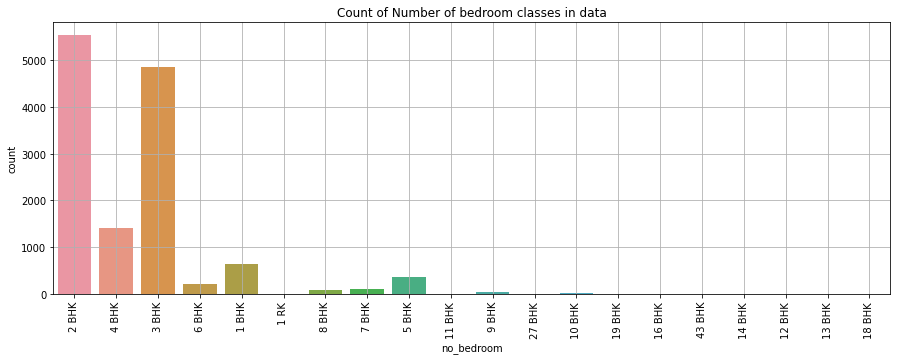

In [31]:
#plotting count wrt to no. of bedroom
plt.figure(figsize=(15,5))
plt.title('Count of Number of bedroom classes in data')
sns.countplot(data.no_bedroom)
plt.xticks(rotation=90);plt.grid()
plt.show()

In [32]:
pd.crosstab(data.no_bedroom,'count')

col_0,count
no_bedroom,
1 BHK,643
1 RK,13
10 BHK,14
11 BHK,4
12 BHK,1
13 BHK,1
14 BHK,1
16 BHK,1
18 BHK,1


There are only one data point for many classes in number of bedroom variable. Also 2BHK has more data points

It is not suitable to fill null values with most repeated classes of the variable i.e., 2BHK

Removing the data with only one value. Ex: 12 BHK, 13 BHK .......43 BHK

In [33]:
#finding the indexes which have only one value of no. of bedroom
data[(data.no_bedroom=='12 BHK') | (data.no_bedroom=='13 BHK') | (data.no_bedroom=='14 BHK') | (data.no_bedroom=='16 BHK') |
    (data.no_bedroom=='18 BHK') | (data.no_bedroom=='19 BHK') | (data.no_bedroom=='27 BHK') | (data.no_bedroom=='43 BHK')]

,area_type,availability,location,no_bedroom,society,total_sqft,bath,balcony,price
1718,Super built-up Area,Ready To Move,Electronic City,27 BHK,NaN,8000,27.0,0.0,230.0
3379,Super built-up Area,Ready To Move,Hanumanth Nagar,19 BHK,NaN,2000,16.0,NaN,490.0
3609,Super built-up Area,Ready To Move,Koramangala,16 BHK,NaN,10000,16.0,NaN,550.0
4684,Plot Area,Ready To Move,Munnekollal,43 BHK,NaN,2400,40.0,0.0,660.0
4916,Super built-up Area,Ready To Move,Channasandra,14 BHK,NaN,1250,15.0,0.0,125.0
6533,Plot Area,Ready To Move,Mysore Road,12 BHK,NaN,2232,6.0,2.0,300.0
9935,Super built-up Area,Ready To Move,Hoysalanagar,13 BHK,NaN,5425,13.0,0.0,275.0
11559,Plot Area,18-Apr,Kasavanhalli,18 BHK,HMwerCo,1200,18.0,NaN,200.0


In [34]:
#dropping index
index = [1718,3379,3609,4684,4916,6533,9935,11559]
data.drop(index,axis=0,inplace=True)

In [35]:
#resetting the index
data.reset_index(drop=True,inplace=True)
data.head()

,area_type,availability,location,no_bedroom,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<AxesSubplot:title={'center':'Relationship between no.of bedrooms and price'}, xlabel='no_bedroom', ylabel='price'>

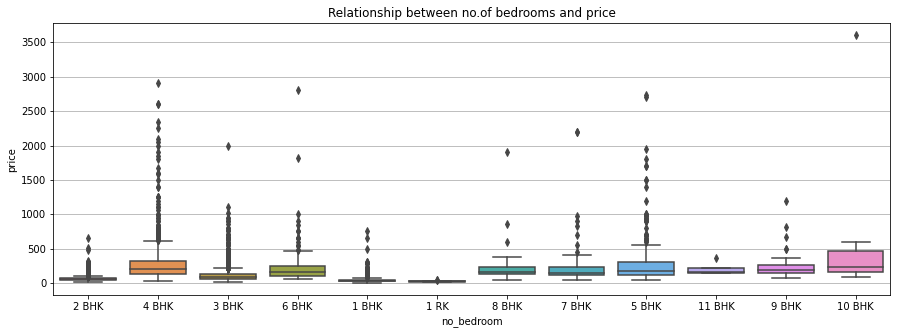

In [36]:
#checking the relationship between no.of bedrooms and price
plt.figure(figsize=(15,5))
plt.title('Relationship between no.of bedrooms and price')
plt.grid()
sns.boxplot(x=data.no_bedroom,y=data.price)

From the above graph, it is observed that price is not completely depend on number of bedrooms

Location =  MYSORE ROAD


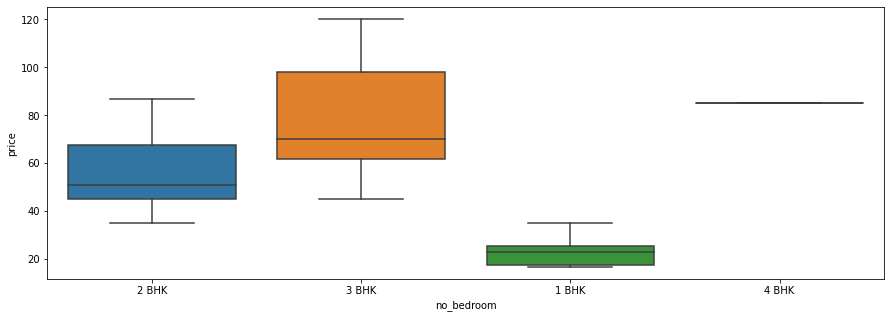

Location =  WHITEFIELD


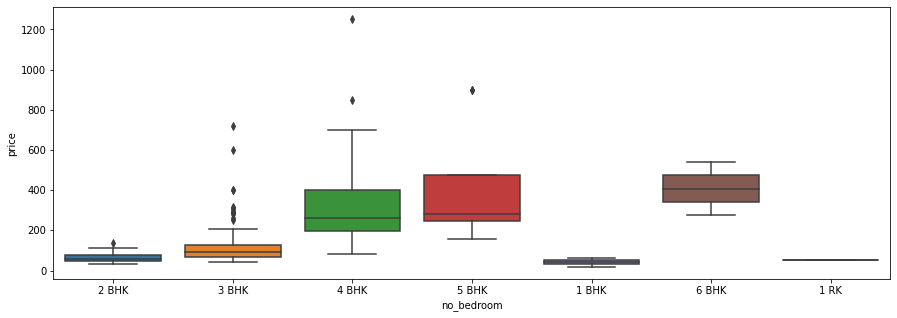

Location =  CHANNASANDRA


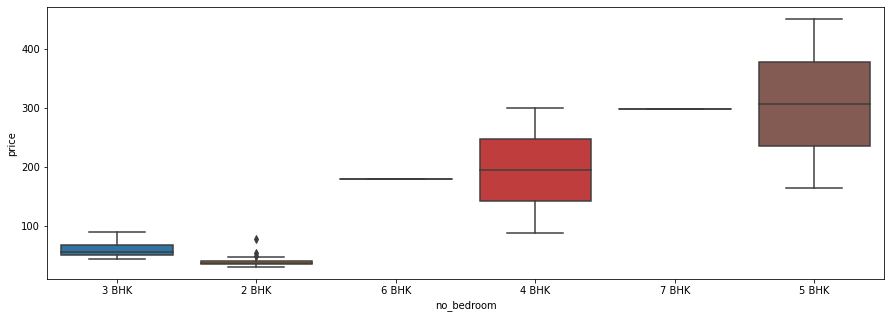

Location =  KORAMANGALA


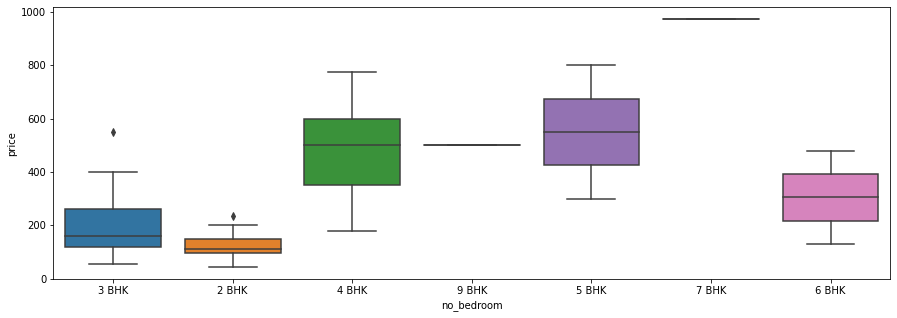

Location =  RR NAGAR


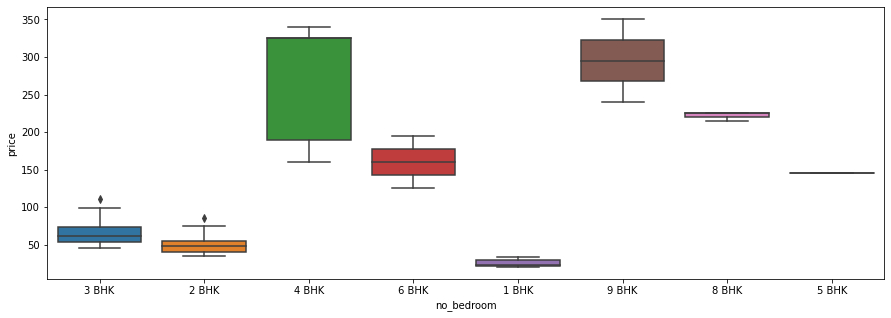

Location =  ELECTRONIC CITY


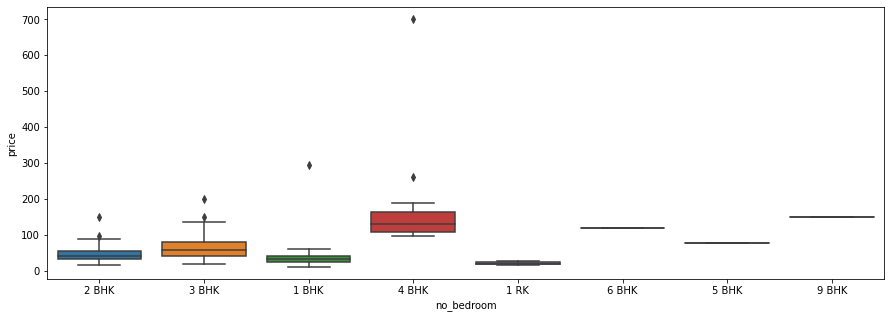

Location =  MUNNEKOLLAL


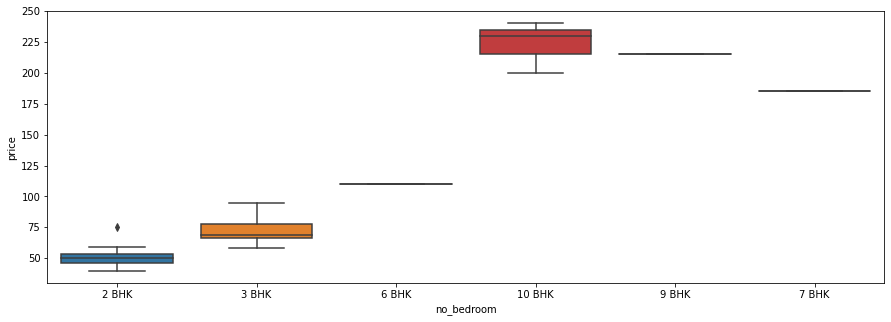

In [37]:
#plotting price vs no of bedroom for some locations
n = ['Mysore Road','Whitefield','Channasandra','Koramangala','RR Nagar','Electronic City','Munnekollal']
for i in n:
    print('Location = ',i.upper())
    plt.figure(figsize=(15,5))
    x = data[data.location==i]
    sns.boxplot(x=x.no_bedroom,y=x.price)
    plt.show()

From the above plot, it is observed that at few places there is chance of error in the data

In [38]:
#checking how the price will vary wrt to location
var = pd.crosstab(index=data.location,columns=data.no_bedroom,aggfunc='mean',values=data.price)
var.head()

no_bedroom,1 BHK,1 RK,10 BHK,11 BHK,2 BHK,3 BHK,4 BHK,5 BHK,6 BHK,7 BHK,8 BHK,9 BHK
location,,,,,,,,,,,,
AECS Layout,NaN,NaN,NaN,NaN,54.508889,84.333333,NaN,225.0,NaN,NaN,NaN,NaN
AGB Layout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,NaN,NaN
AGS Layout,NaN,NaN,NaN,NaN,47.056667,82.400000,NaN,NaN,NaN,NaN,NaN,NaN
AMS Layout,19.0,NaN,NaN,NaN,NaN,80.000000,110.0,NaN,NaN,NaN,NaN,NaN
Aavalahalli,NaN,NaN,NaN,NaN,41.940000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


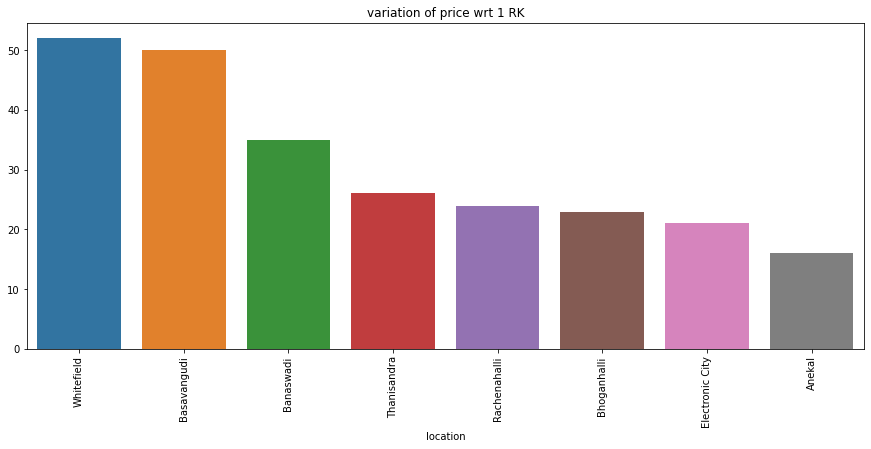

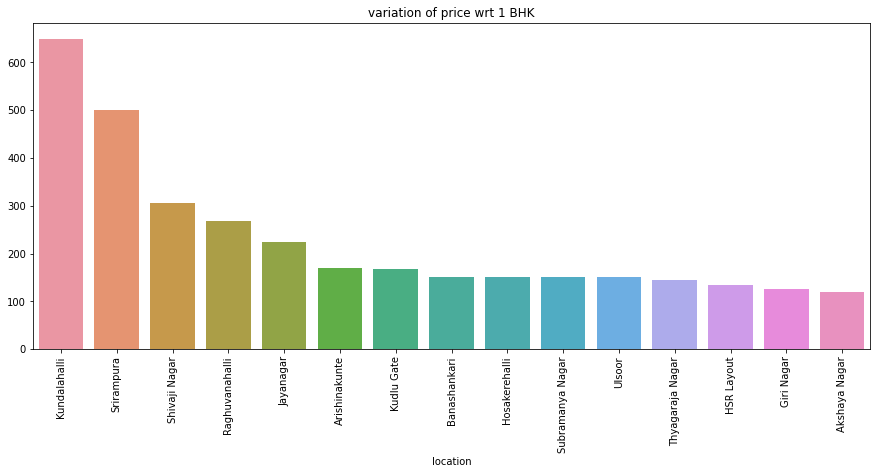

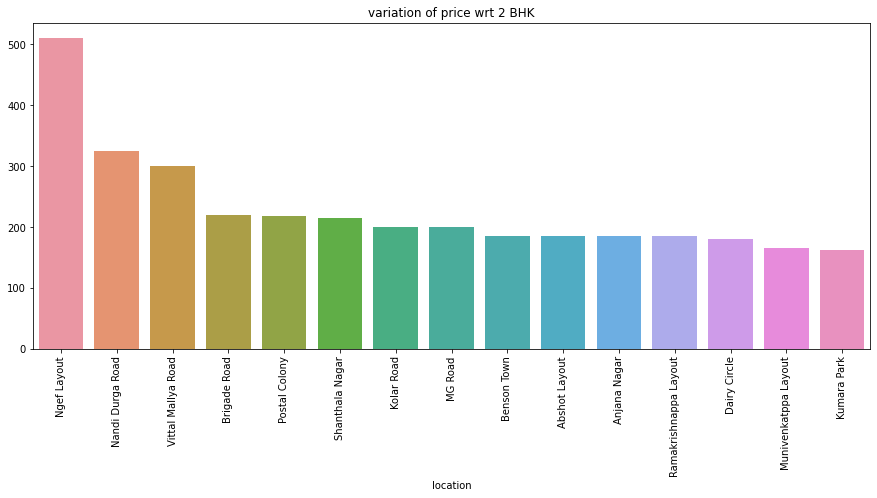

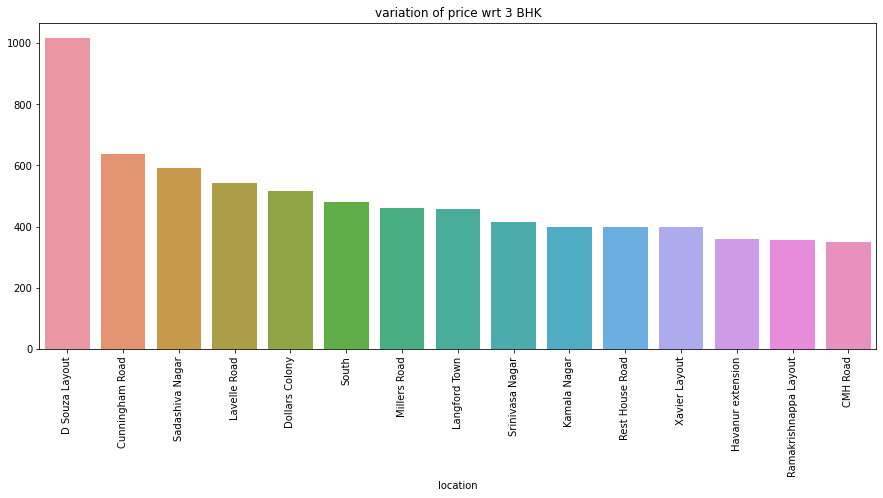

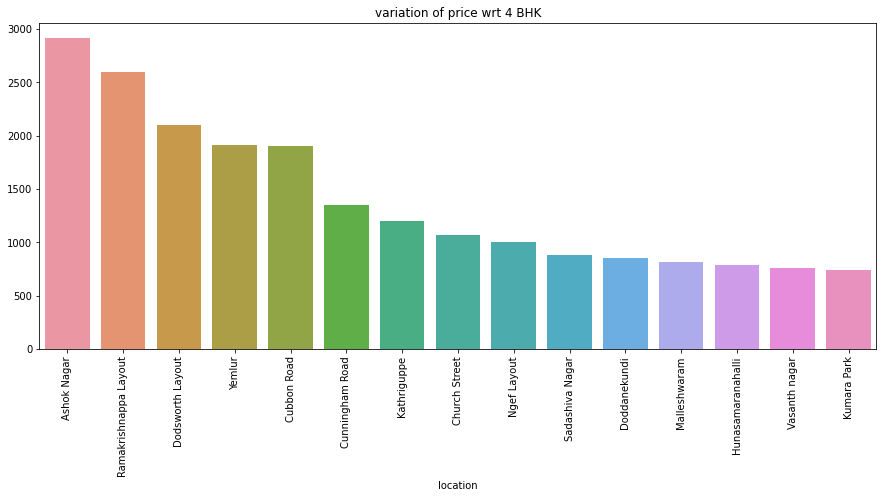

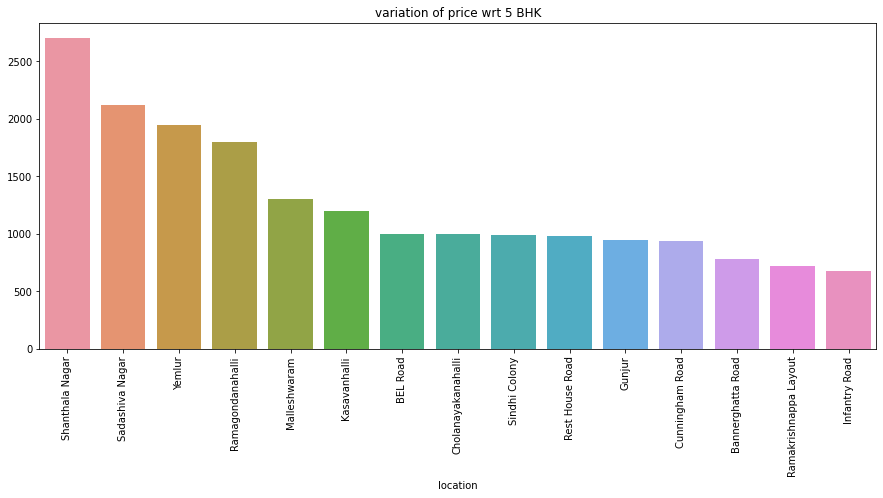

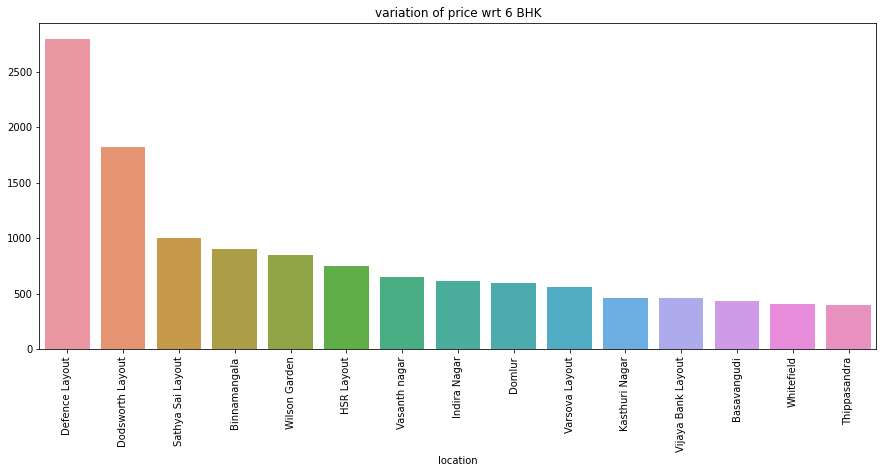

In [39]:
#visualizing the price variation wrt to location and no. of bedroom
cols=['1 RK','1 BHK','2 BHK','3 BHK','4 BHK','5 BHK','6 BHK']
for i in cols:
    plt.figure(figsize=(15,6))
    x = var[i].nlargest(15)
    sns.barplot(x=x.index,y=x.values)
    plt.xticks(rotation=90)
    plt.title('variation of price wrt {}'.format(i))
    plt.show()

Area Name :  JAYANAGAR


C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


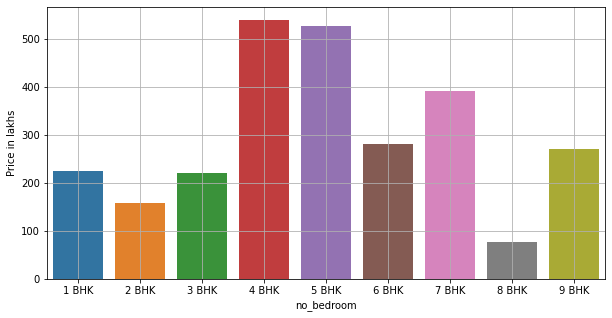

Area Name :  WHITEFIELD


C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


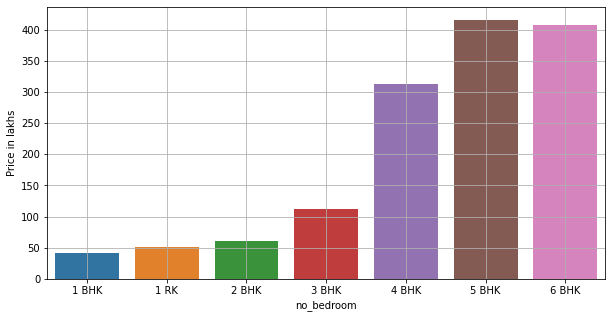

Area Name :  BASAVANGUDI


C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


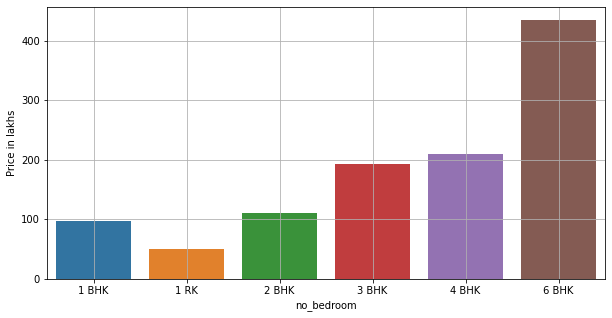

Area Name :  BANASHANKARI


C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


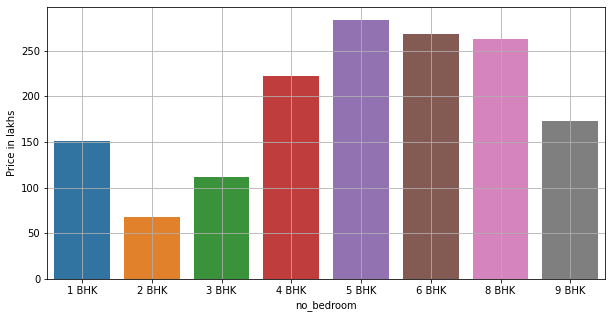

Area Name :  HSR LAYOUT


C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


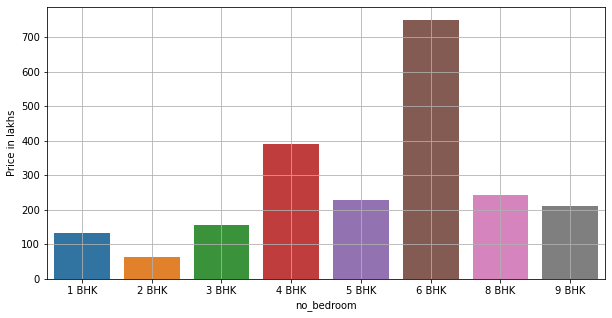

In [40]:
#checking the price variation in famous areas
areas = ['Jayanagar','Whitefield','Basavangudi','Banashankari','HSR Layout']
for i in areas:
    print('Area Name : ',i.upper())
    plt.figure(figsize=(10,5))
    z = var.loc[i].dropna()
    sns.barplot(z.index,z.values)
    plt.ylabel('Price in lakhs')
    plt.grid()
    plt.show()

In [41]:
#Analysis of 'Society variable'
pd.unique(data.society)

array(['Coomee ', 'Theanmp', nan, 'Soiewre', 'DuenaTa', 'Jaades ',
       'Brway G', 'Prrry M', 'Shncyes', 'Skityer', 'PrntaEn', 'Prityel',
       'GrrvaGr', 'PeBayle', 'She 2rk', 'Soitya ', 'Bhe 2ko', 'Itelaa ',
       'ViistLa', 'KBityo ', 'LedorSa', 'Mahosya', 'Kantsce', 'PrarePa',
       'Dieldli', 'Gentson', 'Soini T', 'Ceove G', 'Soazak ', 'LancyRe',
       'Goted U', 'Bhncyis', 'Rosha I', 'Suent V', 'RothaVa', 'NCowsar',
       'Dhalsh ', 'BrereAt', 'Laavevi', 'Chranya', 'HioraTr', 'BMineis',
       'Pruthg ', 'Sonosty', 'SNnia E', 'Anavi B', 'Viony H', 'AdentEl',
       'Gollela', 'Niareum', 'SJlynro', 'Tavenew', 'Srire S', 'Saenti ',
       'Bhmesy ', 'Goardth', 'IBityin', 'KHityry', 'BDensar', 'Makeser',
       'Maest N', 'Oznuean', 'Reeroce', 'Sonviik', 'DSgmax ', 'Cetattu',
       'Vaens G', 'Moity S', 'HiahsLa', 'SNontle', 'Sabixtt', 'Sragei ',
       'SyidaCr', 'Jahts H', 'Inensba', 'Srier P', 'Wiowsri', 'Derdsig',
       'Vaarech', 'TiaksAa', 'HMwerCo', 'ViensRK', 'Somum

In [42]:
data.society.isna().sum()

5495

There 5502 missing values in society variable. Hence the variable is dropped. 

In [43]:
#Analysis of 'Total sqft' variable
d = pd.DataFrame(pd.unique(data.total_sqft),columns=['sqft'])
d

,sqft
0,1056
1,2600
2,1440
3,1521
4,1200
5,1170
6,2732
7,3300
8,1310
9,1020


There are few values with not proper units

In [44]:
data[data.total_sqft=='1Grounds']

,area_type,availability,location,no_bedroom,society,total_sqft,bath,balcony,price
9417,Plot Area,Ready To Move,Ramamurthy Nagar,1 BHK,NaN,1Grounds,1.0,1.0,48.0


In [49]:
#fixing the range values to min value
for i in range(0,len(data)):
    if '-' in data.total_sqft[i]:
        index = data.total_sqft[i].index('-')
        data.total_sqft[i] = data.total_sqft[i][:index-1]

<ipython-input-49-440a169b072d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.total_sqft[i] = data.total_sqft[i][:index-1]


In [50]:
#converting units in total sqft variable to common unit i.e., sqft
for i in range(0,len(data)):
    if 'Sq. Yards' in data.total_sqft[i]:
        value = data.total_sqft[i][:data.total_sqft[i].index('Sq. Yards')]
        data.total_sqft[i] = round(float(value)*9,2)
    
    elif('Sq. Meter' in data.total_sqft[i]):
        value = data.total_sqft[i][:data.total_sqft[i].index('Sq. Meter')]
        data.total_sqft[i] = round(float(value)*10.764,2)
        
    elif('Guntha' in data.total_sqft[i]):
        value = data.total_sqft[i][:data.total_sqft[i].index('Guntha')]
        data.total_sqft[i] = round(float(value)*1089,2)
        
    elif('Acre' in data.total_sqft[i]):
        value = data.total_sqft[i][:data.total_sqft[i].index('Acre')]
        data.total_sqft[i] = round(float(value)*43560,2)
        
    elif('Cents' in data.total_sqft[i]):
        value = data.total_sqft[i][:data.total_sqft[i].index('Cents')]
        data.total_sqft[i] = round(float(value)*435.6,2)   
    elif('Perch' in data.total_sqft[i]):
        value = data.total_sqft[i][:data.total_sqft[i].index('Perch')]
        data.total_sqft[i] = round(float(value)*272.6,2) 
    elif('Grounds' in data.total_sqft[i]):
        value = data.total_sqft[i][:data.total_sqft[i].index('Grounds')]
        data.total_sqft[i] = round(float(value)*2400.6,2) 

<ipython-input-50-6022be251659>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.total_sqft[i] = round(float(value)*10.764,2)
<ipython-input-50-6022be251659>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.total_sqft[i] = round(float(value)*272.6,2)
<ipython-input-50-6022be251659>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.total_sqft[i] = round(float(value)*9,2)
<ipython-input-50-6022be251659>:17: SettingWithCopy

In [51]:
#converting to float
data.total_sqft = data.total_sqft.astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13312 entries, 0 to 13311
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13312 non-null  object 
 1   availability  13312 non-null  object 
 2   location      13312 non-null  object 
 3   no_bedroom    13296 non-null  object 
 4   society       7817 non-null   object 
 5   total_sqft    13312 non-null  float64
 6   bath          13239 non-null  float64
 7   balcony       12706 non-null  float64
 8   price         13312 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.1+ KB


<AxesSubplot:>

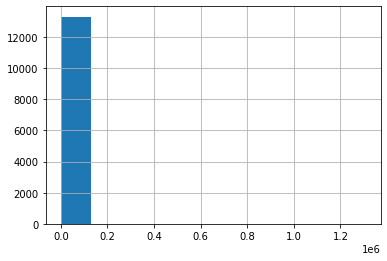

In [52]:
data.total_sqft.hist()

'Total sqft' Variable is not following normal distribution

C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

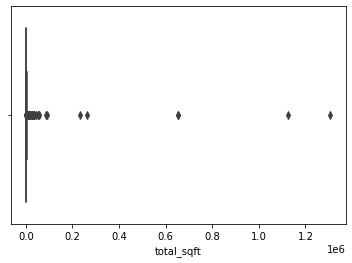

In [53]:
sns.boxplot(data.total_sqft)

There are outliers

In [54]:
#Analysis of 'bath' variable
pd.unique(data.bath)

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       12., 13.])

In [55]:
#checking houses with more than 10 no. of bathroom
data[data.bath>10]

,area_type,availability,location,no_bedroom,society,total_sqft,bath,balcony,price
938,Plot Area,Ready To Move,JP Nagar,9 BHK,NaN,1260.0,11.0,NaN,290.0
1078,Plot Area,Ready To Move,BTM Layout,9 BHK,Srvasks,3300.0,14.0,NaN,500.0
1767,Plot Area,Ready To Move,Ramamurthy Nagar,11 BHK,NaN,1200.0,11.0,0.0,170.0
1952,Plot Area,Ready To Move,KR Puram,8 BHK,NaN,1200.0,12.0,NaN,110.0
1978,Plot Area,Ready To Move,Hongasandra,8 BHK,NaN,990.0,12.0,0.0,120.0
3095,Super built-up Area,Ready To Move,JP Nagar,10 BHK,NaN,12000.0,12.0,NaN,525.0
6931,Plot Area,Ready To Move,HRBR Layout,9 BHK,NaN,2600.0,12.0,NaN,675.0
7973,Super built-up Area,Ready To Move,Immadihalli,11 BHK,NaN,6000.0,12.0,NaN,150.0
8100,Plot Area,Ready To Move,Wilson Garden,8 BHK,NaN,1850.0,12.0,NaN,300.0
8630,Super built-up Area,Ready To Move,Neeladri Nagar,10 BHK,NaN,4000.0,12.0,NaN,160.0


C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'checking outliers'}, xlabel='bath'>

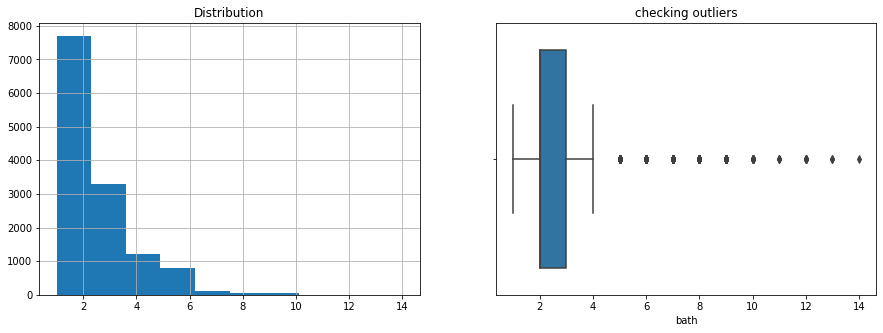

In [56]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].set_title('Distribution')
data.bath.hist(ax=axes[0])

axes[1].set_title('checking outliers')
sns.boxplot(data.bath,ax=axes[1])

There are few outliers

In [57]:
data[data.bath.isna()]

,area_type,availability,location,no_bedroom,society,total_sqft,bath,balcony,price
56,Built-up Area,20-Feb,Devanahalli,4 BHK,BrereAt,3010.00,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur,4 BHK,Gollela,2957.00,NaN,NaN,224.500
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520.00,NaN,NaN,74.820
344,Super built-up Area,21-Dec,Kanakapura Main Road,1 BHK,PrarePa,525.00,NaN,NaN,21.530
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200.00,NaN,NaN,34.185
669,Super built-up Area,18-Dec,JP Nagar,5 BHK,Pehtsa,4400.00,NaN,NaN,375.000
702,Super built-up Area,18-Dec,JP Nagar,5 BHK,Pehtsa,4400.00,NaN,NaN,548.500
801,Super built-up Area,18-Dec,JP Nagar,4 BHK,Pehtsa,4000.00,NaN,NaN,453.000
941,Super built-up Area,Ready To Move,Whitefield,4 BHK,PrOakSi,3606.00,NaN,NaN,304.000
1264,Built-up Area,18-May,Hennur,3 BHK,Asoilul,2264.00,NaN,NaN,155.000


In [58]:
#analysis of 'balcony' variable
pd.unique(data.balcony)

array([ 1.,  3., nan,  2.,  0.])

C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balcony', ylabel='count'>

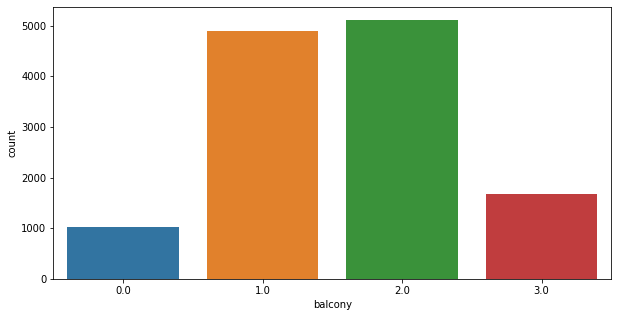

In [59]:
#visualizing the balcony variable
plt.figure(figsize=(10,5))
sns.countplot(data.balcony)

<AxesSubplot:xlabel='balcony', ylabel='price'>

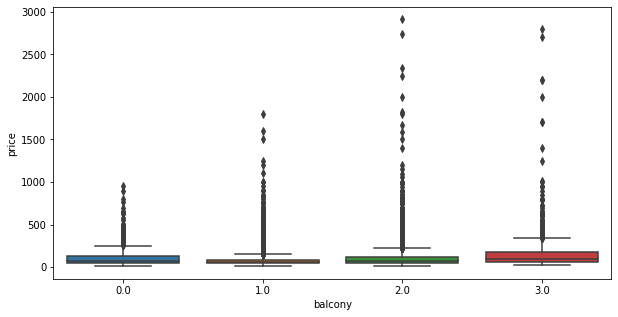

In [60]:
#checking how price varies with number of balcony
plt.figure(figsize=(10,5))
sns.boxplot(x=data.balcony,y=data.price)

In [61]:
b = pd.crosstab(index=data.no_bedroom,columns=data.balcony)
b['maxim'] = b.idxmax(axis=1)
b

balcony,0.0,1.0,2.0,3.0,maxim
no_bedroom,,,,,
1 BHK,179,419,35,2,1.0
1 RK,7,6,0,0,0.0
10 BHK,0,0,0,3,3.0
11 BHK,1,0,0,2,3.0
2 BHK,355,2735,2062,328,1.0
3 BHK,219,1245,2331,861,2.0
4 BHK,169,324,458,287,2.0
5 BHK,39,95,100,65,2.0
6 BHK,27,39,69,57,2.0


The null values in balcony variable is filled from above table

C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'checking outliers'}, xlabel='price'>

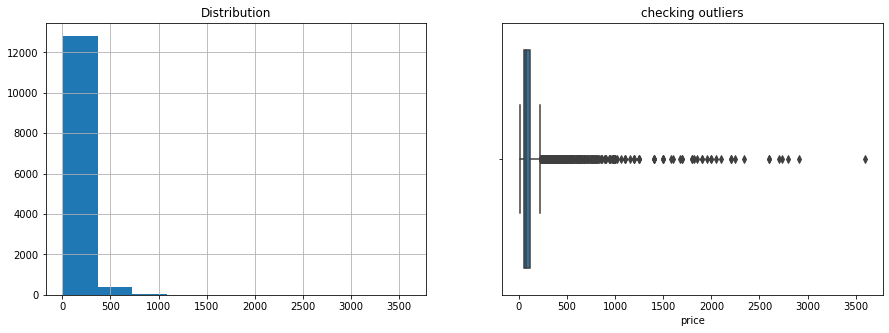

In [62]:
#Analysis of price variable
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].set_title('Distribution')
data.price.hist(ax=axes[0])

axes[1].set_title('checking outliers')
sns.boxplot(data.price,ax=axes[1])

Price variable is not following the normal distribution. Hence the transormation technique is used i.e., log function

In [63]:
#Filling the missing values from above analysis
print(len(data[(data.bath.isna()) & (data.no_bedroom.isna())]))
data[(data.bath.isna()) & (data.no_bedroom.isna())]

16


,area_type,availability,location,no_bedroom,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200.0,NaN,NaN,34.185
1774,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000.0,NaN,NaN,124.000
2263,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400.0,NaN,NaN,460.000
2808,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200.0,NaN,NaN,28.785
2861,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500.0,NaN,NaN,46.800
5328,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100.0,NaN,NaN,177.115
6418,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324.0,NaN,NaN,26.730
6630,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500.0,NaN,NaN,25.490
6713,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800.0,NaN,NaN,28.545
7674,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000.0,NaN,NaN,400.000


<AxesSubplot:xlabel='no_bedroom', ylabel='total_sqft'>

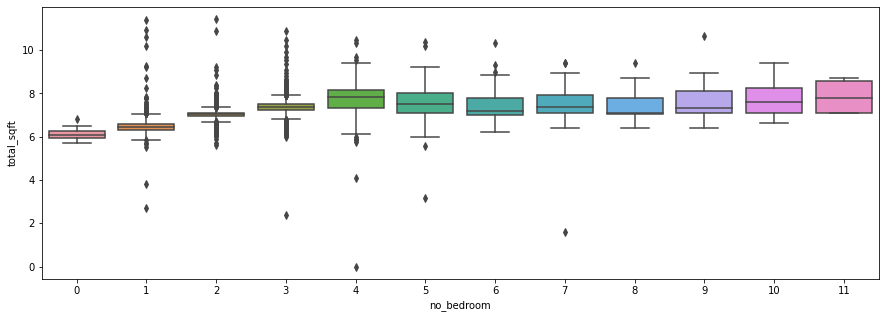

In [111]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data.no_bedroom,y=data.total_sqft)

Because of outliers we cannot visualize the above graph

Since number of bedrooms increase with increse in sqft.

From the above graph, it is observed that there are 6 extreme outliers in total sqft variable wrt to no. of bedroom.

In [65]:
#restricting sqft to 200000
data[data.total_sqft>200000]

,area_type,availability,location,no_bedroom,society,total_sqft,bath,balcony,price
648,Built-up Area,Ready To Move,Arekere,9 BHK,NaN,1124475.0,9.0,NaN,265.0
1019,Plot Area,18-Mar,Marathi Layout,1 BHK,NaN,231303.6,1.0,0.0,110.0
1086,Plot Area,19-Mar,Narasapura,2 BHK,NaN,1306800.0,2.0,2.0,29.5
6995,Plot Area,Ready To Move,Thyagaraja Nagar,8 BHK,NaN,653400.0,6.0,2.0,290.0
7601,Plot Area,Ready To Move,Bommanahalli,3 BHK,Prood G,653400.0,3.0,1.0,217.0
11607,Plot Area,Ready To Move,Arudi,3 BHK,NaN,261360.0,2.0,0.0,80.0


In [66]:
#dropping the above indexes
index = [648,1019,1086,6995,7601,11607]
data.drop(index,axis=0,inplace=True)

In [67]:
#resetting the index
data.reset_index(drop=True,inplace=True)
data.head()

,area_type,availability,location,no_bedroom,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [68]:
#creating the dataframe with mean sqft and mean price wrt no of bedroom
c = pd.DataFrame(pd.crosstab(index=data.no_bedroom,columns='mean_ft',values=data.total_sqft,aggfunc='mean'))
d = pd.DataFrame(pd.crosstab(index=data.no_bedroom,columns='mean_price',values=data.price,aggfunc='mean'))
e = pd.concat([c,d],axis=1)
e.sort_index(ascending=False)

col_0,mean_ft,mean_price
no_bedroom,,
9 BHK,3018.717358,241.509434
8 BHK,1922.056818,206.613636
7 BHK,2309.750000,244.370000
6 BHK,2041.125656,223.927602
5 BHK,2540.280871,281.549157
4 BHK,2708.939541,270.634474
3 BHK,1687.957666,110.936858
2 BHK,1165.262484,59.584654
11 BHK,3350.000000,207.500000


<AxesSubplot:title={'center':'Mean total price'}, xlabel='no_bedroom', ylabel='mean_price'>

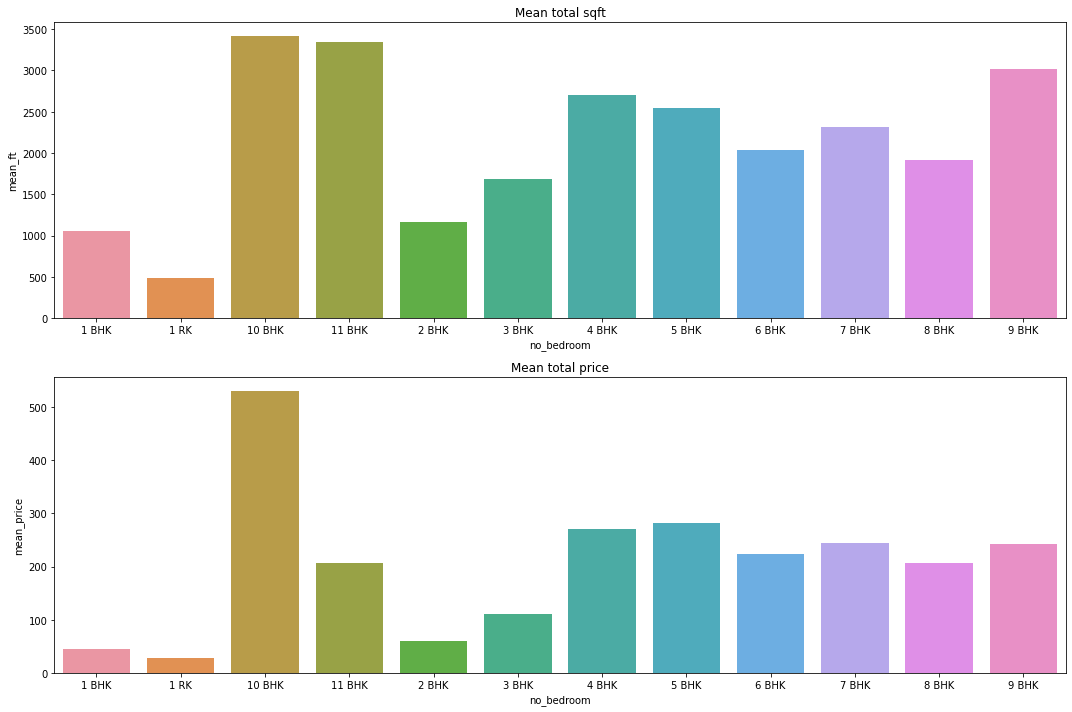

In [69]:
#plotting the graph for above dataframe
fig, axes = plt.subplots(2,1,figsize=(15,10),tight_layout=True)
axes[0].set_title('Mean total sqft')
sns.barplot(x=e.index,y=e.mean_ft,ax=axes[0])

axes[1].set_title('Mean total price')
sns.barplot(x=e.index,y=e.mean_price,ax=axes[1])

From the above graph, it is observed that total sqft is the ideal input to be used for filling the missing values in no. of bedroom

In [70]:
#filling the missing values for no of bedroom
x = data[data.no_bedroom.isna()]
for i in x.index:
    if(data.iloc[i,5] <= 1418.52):
        data.iloc[i,3] = '2 BHK'
    elif((data.iloc[i,5] > 1418.52) & (data.iloc[i,5] <= 1878.73)):
        data.iloc[i,3] = '3 BHK'
    elif((data.iloc[i,5] > 1878.73) & (data.iloc[i,5] <= 2730.74)):
        data.iloc[i,3] = '4 BHK'
    else:
        data.iloc[i,3] = '5 BHK'

In [71]:
data.isna().sum()

area_type          0
availability       0
location           0
no_bedroom         0
society         5490
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [72]:
#filling the missing values of balcony variable
x = data[data.balcony.isna()]
for i in x.index:
    for j in range(0,len(b)):
        if(b.index[j] == data.no_bedroom[i]):
            data.balcony.iloc[i] = b.maxim[j]

C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [73]:
#checking NaN values in bath variable
data[data.bath.isna()]

,area_type,availability,location,no_bedroom,society,total_sqft,bath,balcony,price
56,Built-up Area,20-Feb,Devanahalli,4 BHK,BrereAt,3010.00,NaN,2.0,192.000
81,Built-up Area,18-Oct,Hennur,4 BHK,Gollela,2957.00,NaN,2.0,224.500
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520.00,NaN,2.0,74.820
344,Super built-up Area,21-Dec,Kanakapura Main Road,1 BHK,PrarePa,525.00,NaN,1.0,21.530
579,Plot Area,Immediate Possession,Sarjapur Road,2 BHK,Asiss B,1200.00,NaN,1.0,34.185
668,Super built-up Area,18-Dec,JP Nagar,5 BHK,Pehtsa,4400.00,NaN,2.0,375.000
701,Super built-up Area,18-Dec,JP Nagar,5 BHK,Pehtsa,4400.00,NaN,2.0,548.500
800,Super built-up Area,18-Dec,JP Nagar,4 BHK,Pehtsa,4000.00,NaN,2.0,453.000
940,Super built-up Area,Ready To Move,Whitefield,4 BHK,PrOakSi,3606.00,NaN,2.0,304.000
1261,Built-up Area,18-May,Hennur,3 BHK,Asoilul,2264.00,NaN,2.0,155.000


In [74]:
#creating the dataframe of no. of bedroom and no of bath
c = pd.crosstab(index=data.no_bedroom,columns=data.bath)
c['maxim'] = c.idxmax(axis=1)
c

bath,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,maxim
no_bedroom,,,,,,,,,,,,,,,
1 BHK,595,40,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1 RK,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
10 BHK,0,0,0,0,0,0,1,1,2,6,1,2,1,0,10.0
11 BHK,0,0,0,0,0,1,0,0,1,0,1,1,0,0,6.0
2 BHK,176,5285,61,4,0,0,0,0,0,0,0,0,0,0,2.0
3 BHK,2,1514,2980,298,35,2,0,0,0,0,0,0,0,0,3.0
4 BHK,1,62,199,779,267,84,1,2,0,0,0,0,0,0,4.0
5 BHK,0,4,30,97,173,33,15,1,0,0,0,0,0,0,5.0
6 BHK,0,0,12,34,31,116,16,9,3,0,0,0,0,0,6.0


Missing values of bath variable is filled wrt to above table

In [75]:
#filling the missing values 
x = data[data.bath.isna()]
for i in x.index:
    if((data.no_bedroom[i]=='1 BHK') | (data.no_bedroom[i]=='1 RK')):
        data.bath[i] = 1
    elif(data.no_bedroom[i]=='2 BHK'):
        data.bath[i] = 2
    elif(data.no_bedroom[i]=='3 BHK'):
        data.bath[i] = 3
    elif(data.no_bedroom[i]=='4 BHK'):
        data.bath[i] = 4
    elif(data.no_bedroom[i]=='5 BHK'):
        data.bath[i] = 5

<ipython-input-75-94e1a9e29264>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.bath[i] = 4
<ipython-input-75-94e1a9e29264>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.bath[i] = 3
<ipython-input-75-94e1a9e29264>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.bath[i] = 1
<ipython-input-75-94e1a9e29264>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [76]:
#removing society and availability variable
data.drop(['availability','society'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13306 entries, 0 to 13305
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13306 non-null  object 
 1   location    13306 non-null  object 
 2   no_bedroom  13306 non-null  object 
 3   total_sqft  13306 non-null  float64
 4   bath        13306 non-null  float64
 5   balcony     13306 non-null  float64
 6   price       13306 non-null  float64
dtypes: float64(4), object(3)
memory usage: 727.8+ KB


In [77]:
#label encoder for object variables
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

#encoding the Area variable
data.area_type = encode.fit_transform(data.area_type)
encode_area_mapping = pd.DataFrame(zip(encode.classes_, encode.transform(encode.classes_)),columns=['Area','encod_area'])
encode_area_mapping.set_index('Area',inplace=True)

#encoding the Location variable
data.location = encode.fit_transform(data.location)
encode_location_mapping = pd.DataFrame(zip(encode.classes_, encode.transform(encode.classes_)),columns=['Location','encod_location'])
encode_location_mapping.set_index('Location',inplace=True)

#encoding the no of bedroom variable
bedroom = {'1 RK':0,'1 BHK':1,'2 BHK':2,'3 BHK':3,'4 BHK':4,'5 BHK':5,'6 BHK':6,'7 BHK':7,'8 BHK':8,'9 BHK':9,'10 BHK':10,
           '11 BHK':11}
data.no_bedroom.replace(bedroom,inplace=True)
encode_bedroom_mapping = pd.DataFrame(index = bedroom.keys(),data=bedroom.values(),columns=['Encoded_label'])

In [78]:
encode_area_mapping

,encod_area
Area,
Built-up Area,0
Carpet Area,1
Plot Area,2
Super built-up Area,3


In [79]:
encode_location_mapping

,encod_location
Location,
AECS Layout,0
AGB Layout,1
AGS Layout,2
AMS Layout,3
Aavalahalli,4
Abbaiah Reddy Layout,5
Abbigere,6
Abshot Layout,7
Achins Road,8


In [80]:
encode_bedroom_mapping

,Encoded_label
1 RK,0
1 BHK,1
2 BHK,2
3 BHK,3
4 BHK,4
5 BHK,5
6 BHK,6
7 BHK,7
8 BHK,8
9 BHK,9


In [81]:
#checking updated values
data.head()

,area_type,location,no_bedroom,total_sqft,bath,balcony,price
0,3,262,2,1056.0,2.0,1.0,39.07
1,2,174,4,2600.0,5.0,3.0,120.00
2,0,856,3,1440.0,2.0,3.0,62.00
3,3,513,3,1521.0,3.0,1.0,95.00
4,3,480,2,1200.0,2.0,1.0,51.00


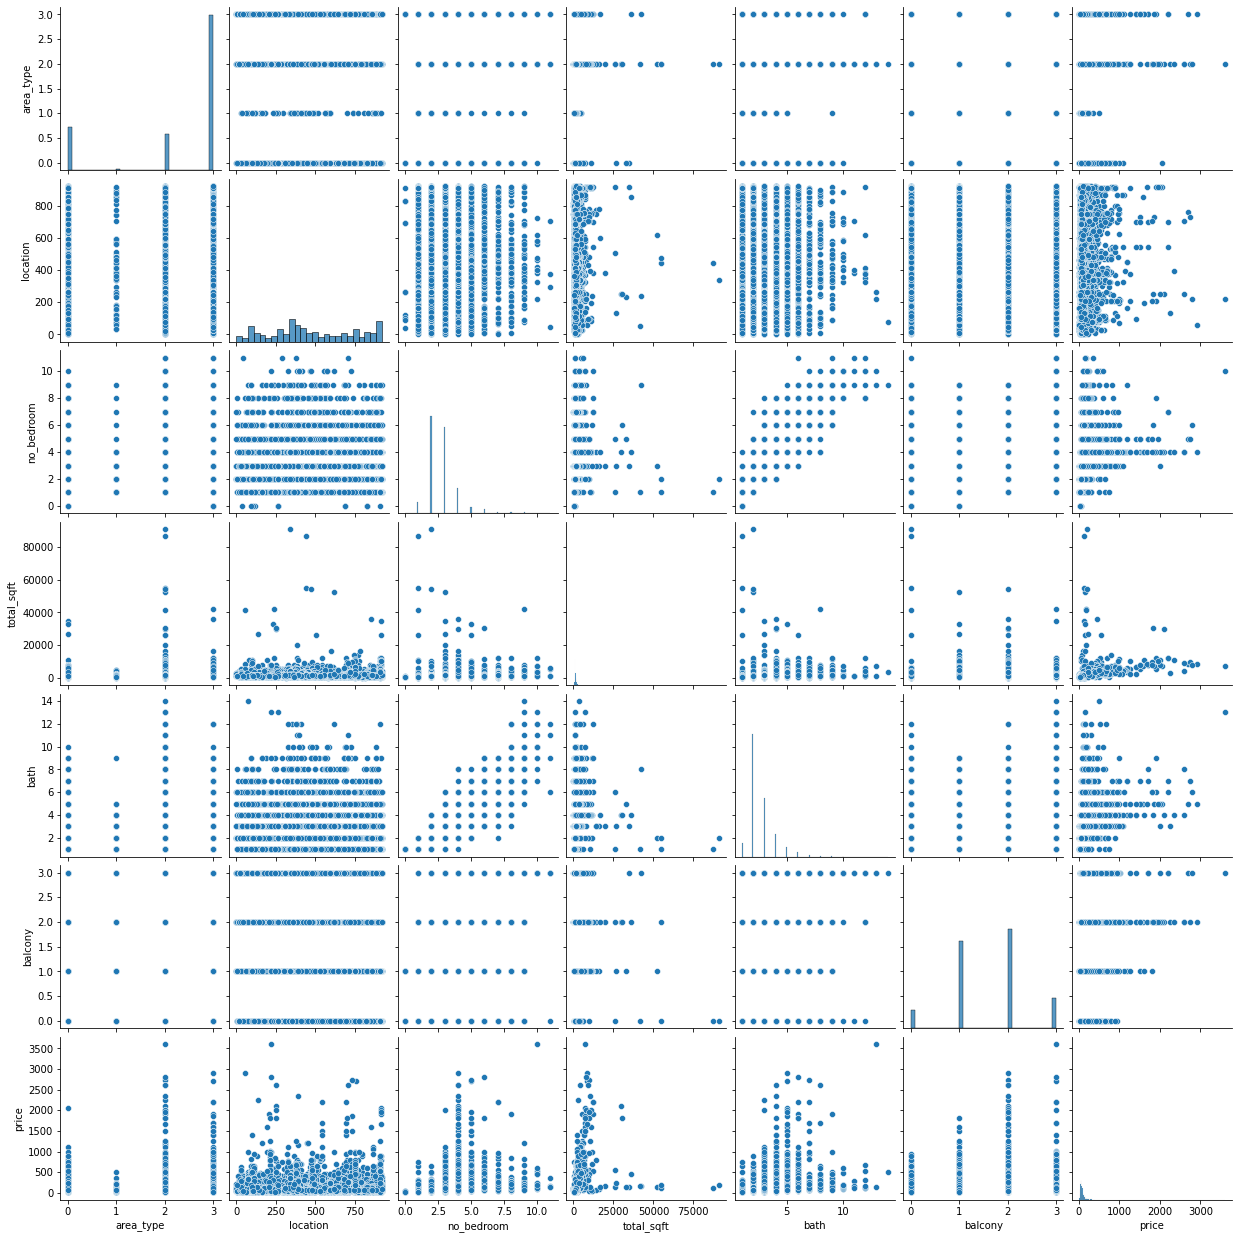

In [82]:
#visualizing after filled values
sns.pairplot(data)

<AxesSubplot:>

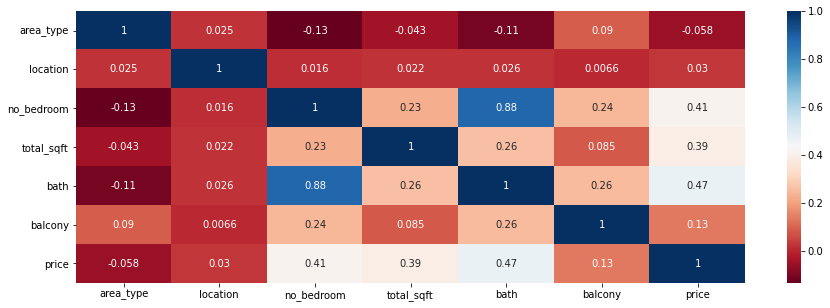

In [83]:
#checking corelation
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

No. of bedroom and bath variable are highly corelated hence bath variable is removed for training algorithms

C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Checking outlier for Price variable'}, xlabel='price'>

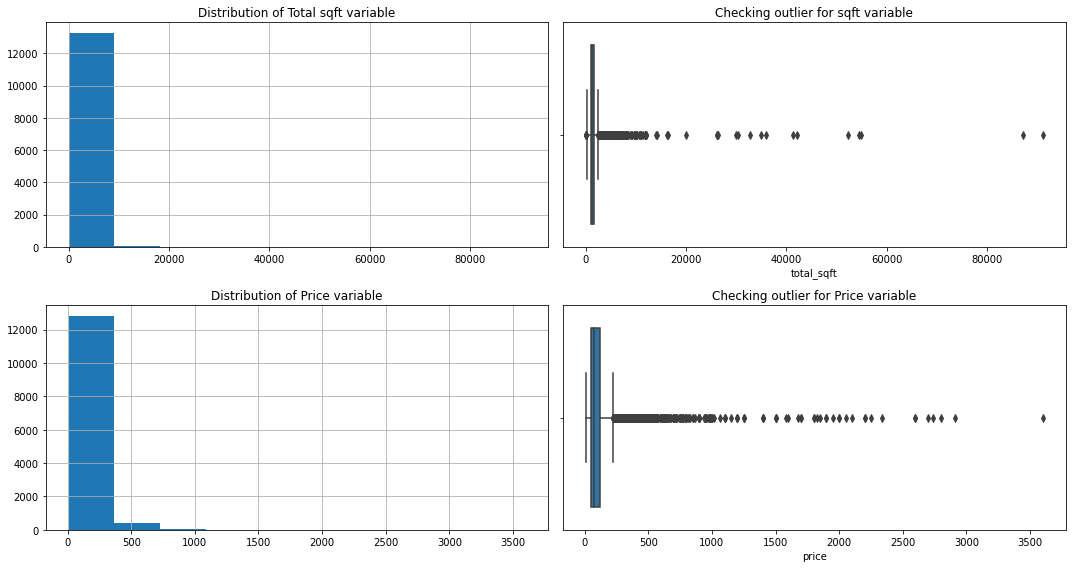

In [84]:
#visualizing continuous variable
fig, axes = plt.subplots(2,2,figsize=(15,8),tight_layout=True)
axes[0][0].set_title('Distribution of Total sqft variable')
data.total_sqft.hist(ax=axes[0][0])

axes[1][0].set_title('Distribution of Price variable')
data.price.hist(ax=axes[1][0])

axes[0][1].set_title('Checking outlier for sqft variable')
sns.boxplot(data.total_sqft,ax=axes[0][1])

axes[1][1].set_title('Checking outlier for Price variable')
sns.boxplot(data.price,ax=axes[1][1])

The continuous variables are not following normal distribution and also have outliers. To overcome that take log transformation of variable

In [85]:
#applying log transform function
data.total_sqft = np.log(data.total_sqft)
data.price = np.log(data.price)

C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Checking outlier for Price variable'}, xlabel='price'>

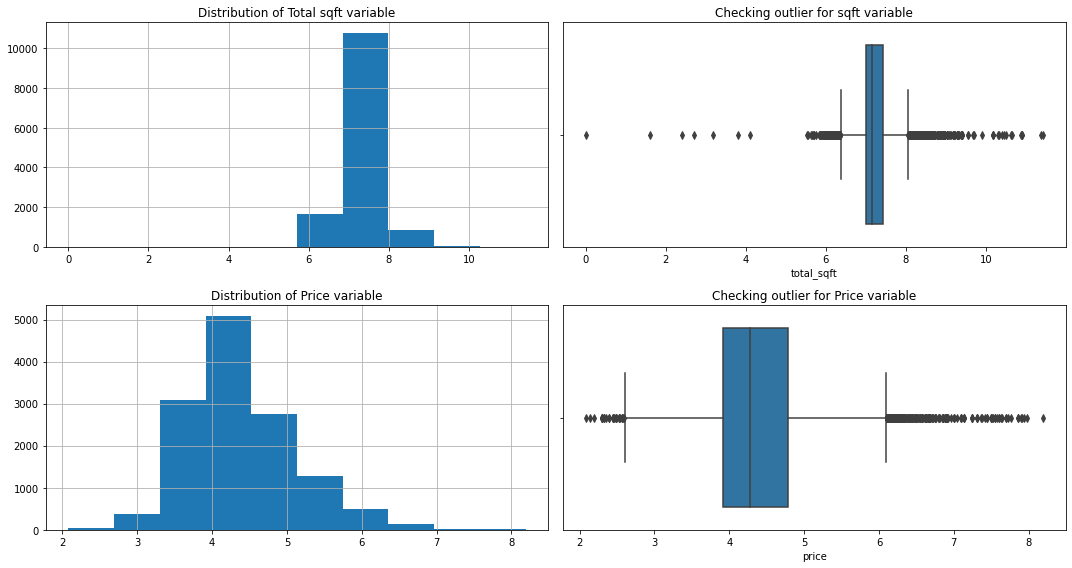

In [86]:
#again plotting the histogram and boxplot
fig, axes = plt.subplots(2,2,figsize=(15,8),tight_layout=True)
axes[0][0].set_title('Distribution of Total sqft variable')
data.total_sqft.hist(ax=axes[0][0])

axes[0][1].set_title('Checking outlier for sqft variable')
sns.boxplot(data.total_sqft,ax=axes[0][1])

axes[1][0].set_title('Distribution of Price variable')
data.price.hist(ax=axes[1][0])

axes[1][1].set_title('Checking outlier for Price variable')
sns.boxplot(data.price,ax=axes[1][1])

## Splitting the data

In [87]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['price','bath'],axis=1),data.price,test_size=0.2,random_state=1)
print('Shape of Splitting : ')
print('x_train = {} \ny_train = {}\n\nx_test = {}\ny_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting : 
x_train = (10644, 5) 
y_train = (10644,)

x_test = (2662, 5)
y_test = (2662,)


# Building the models

## Linear model

In [89]:
#linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [90]:
#initializing the model and predicting for test data
lin_model = LinearRegression(fit_intercept=True)
pred_lin = lin_model.fit(x_train,y_train).predict(x_test)

#printing RMSE and r2 value
print('r square value is ',r2_score(y_test,pred_lin))
rmse_lin = np.sqrt(mean_squared_error(y_test,pred_lin))
print('RMSE : ',rmse_lin)

r square value is  0.6459700711188172
RMSE :  0.439865921567834


In [91]:
#finding residuals and checking its mean
residual = pred_lin - y_test
np.mean(residual)

-0.003686104184787269

<AxesSubplot:ylabel='price'>

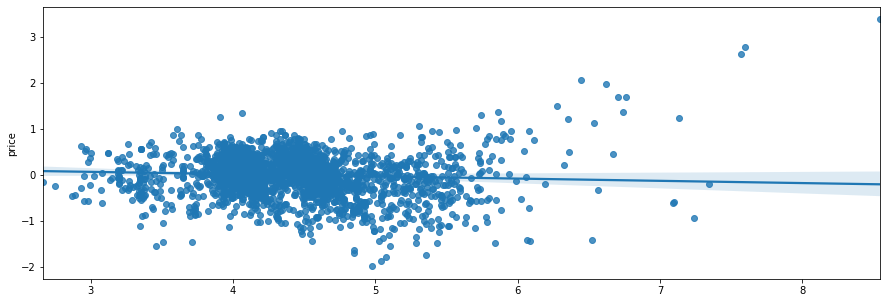

In [92]:
#plotting variance of residuals
plt.figure(figsize=(15,5))
sns.regplot(y=residual,x=pred_lin)

From the graph, it is observed that residuals show slightly heteroscedasticity

In [93]:
#Ridge regression model
from sklearn.linear_model import Ridge
rid = Ridge()
pred_rid = rid.fit(x_train,y_train).predict(x_test)

print('r square value is ',r2_score(y_test,pred_rid))
rmse_rid = np.sqrt(mean_squared_error(y_test,pred_rid))
print('RMSE = ',rmse_rid)

r square value is  0.645936654657754
RMSE =  0.4398866802868133


In [94]:
#checking hyper parameters
rid.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [95]:
#hyper parameter tuning for ridge regression
params = {'alpha': [1,0.1,0.01,0.001,10]}

grid = GridSearchCV(estimator=rid,param_grid=params,cv=5,verbose=1,n_jobs=-1)

grid.fit(x_train,y_train)
print('best score = ',grid.best_score_)
print('best params = ',grid.best_params_)

pred_rid = grid.predict(x_test)
print('r square value is ',r2_score(y_test,pred_rid))
rmse_rid = np.sqrt(mean_squared_error(y_test,pred_rid))
print('RMSE = ',rmse_rid)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


best score =  0.6054733631899004
best params =  {'alpha': 10}
r square value is  0.6456321891517278
RMSE =  0.44007577292032474


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.3s finished


In [96]:
#Lasso regression model
from sklearn.linear_model import Lasso
las = Lasso()
pred_las = las.fit(x_train,y_train).predict(x_test)

print('r square value is ',r2_score(y_test,pred_las))
rmse_las = np.sqrt(mean_squared_error(y_test,pred_las))
print('RMSE = ',rmse_las)

r square value is  0.0028960741212414876
RMSE =  0.7381940505159246


In [97]:
#checking hyper parameters
las.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [98]:
#hyper parameter tuning for lasso regression
params = {'alpha': [1,0.1,0.01,0.001,0.0001],'max_iter':[5,10,15,20]}

grid = GridSearchCV(estimator=las,param_grid=params,cv=5,verbose=1,n_jobs=-1)

grid.fit(x_train,y_train)
print('best score = ',grid.best_score_)
print('best params = ',grid.best_params_)

pred_las = grid.predict(x_test)
print('r square value is ',r2_score(y_test,pred_las))
rmse_las = np.sqrt(mean_squared_error(y_test,pred_las))
print('RMSE = ',rmse_las)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.7s


best score =  0.605458094229318
best params =  {'alpha': 0.001, 'max_iter': 5}
r square value is  0.6456181614803305
RMSE =  0.44008448304727854


[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 636.7151828448061, tolerance: 0.5466384567816832
  model = cd_fast.enet_coordinate_descent(


## KNearest Neighbour model

In [99]:
#importing KNN model
from sklearn.neighbors import KNeighborsRegressor

In [100]:
#initializing the model and predicting for test data
knn = KNeighborsRegressor()
pred_knn = knn.fit(x_train,y_train).predict(x_test)

#printing RMSE and r2 value
print('r square value is ',r2_score(y_test,pred_knn))
rmse_knn = np.sqrt(mean_squared_error(y_test,pred_knn))
print('RMSE : ',rmse_knn)

r square value is  0.6651974034074428
RMSE :  0.42775464705879934


In [101]:
#hyper parameters
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [102]:
#hyper parameter tuning for knn
params = {'n_neighbors': range(1,15),'leaf_size' : range(1,15)}

grid = GridSearchCV(estimator=knn,param_grid=params,cv=5,verbose=1,n_jobs=-1)

grid.fit(x_train,y_train)
print('best score = ',grid.best_score_)
print('best params = ',grid.best_params_)

pred_knn = grid.predict(x_test)
print('r square value is ',r2_score(y_test,pred_knn))
rmse_knn = np.sqrt(mean_squared_error(y_test,pred_knn))
print('RMSE = ',rmse_knn)

Fitting 5 folds for each of 196 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 712 tasks      | elapsed:   22.0s


best score =  0.6347147813471679
best params =  {'leaf_size': 9, 'n_neighbors': 3}
r square value is  0.6756472363038728
RMSE =  0.42102620640012695


[Parallel(n_jobs=-1)]: Done 980 out of 980 | elapsed:   27.6s finished


## Decision Tree model

In [103]:
#importing the decision tree model
from sklearn.tree import DecisionTreeRegressor

In [104]:
#initializing the model and predicting for test data
decis = DecisionTreeRegressor()
pred_decis = decis.fit(x_train,y_train).predict(x_test)

#printing RMSE and r2 value
print('r square value is ',r2_score(y_test,pred_decis))
rmse_decis = np.sqrt(mean_squared_error(y_test,pred_decis))
print('RMSE : ',rmse_decis)

r square value is  0.6258370544439018
RMSE :  0.45220016398076585


In [105]:
#checking the hyper parameters
decis.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [106]:
#hyper parameter tuning for Decision Tree
params = {'criterion': ['mse','mae'],
          'splitter' : ["best", "random"],
          'max_features':["auto", "sqrt"],
          "min_samples_split": [10, 20, 40],
          "max_depth": [2, 6, 8],
          "min_samples_leaf": [10, 20],
          "max_leaf_nodes": [5, 20, 100]}

grid = GridSearchCV(estimator=decis,param_grid=params,cv=5,verbose=1,n_jobs=-1)

grid.fit(x_train,y_train)
print('best score = ',grid.best_score_)
print('best params = ',grid.best_params_)

pred_decis = grid.predict(x_test)
print('r square value is ',r2_score(y_test,pred_decis))
rmse_decis = np.sqrt(mean_squared_error(y_test,pred_decis))
print('RMSE = ',rmse_decis)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 580 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 1322 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1672 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2122 tasks      | elapsed:  6.9min


best score =  0.7226131516623296
best params =  {'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10, 'splitter': 'best'}
r square value is  0.7438110937389033
RMSE =  0.374179928237908


[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  7.1min finished


## XGBoost model

In [107]:
#importing the XGB model
from xgboost import XGBRegressor

In [108]:
#initializing the model and predicting for test data
xgb = XGBRegressor()
pred_xgb = xgb.fit(x_train,y_train).predict(x_test)

#printing RMSE and r2 value
print('r square value is ',r2_score(y_test,pred_xgb))
rmse_xgb = np.sqrt(mean_squared_error(y_test,pred_xgb))
print('RMSE : ',rmse_xgb)

r square value is  0.8220614852454082
RMSE :  0.31184250338088154


In [109]:
#checking the hyper parameters
xgb.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [110]:
#hyper parameter tuning for XGBoost 
params = {'n_estimators' : [50,75,100],
          "max_depth": range(1,10)}

grid = GridSearchCV(estimator=xgb,param_grid=params,cv=5,verbose=1,n_jobs=-1)

grid.fit(x_train,y_train)
print('best score = ',grid.best_score_)
print('best params = ',grid.best_params_)

pred_xgb = grid.predict(x_test)
print('r square value is ',r2_score(y_test,pred_xgb))
rmse_xgb = np.sqrt(mean_squared_error(y_test,pred_xgb))
print('RMSE = ',rmse_xgb)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   32.8s finished


best score =  0.7996412883094335
best params =  {'max_depth': 7, 'n_estimators': 100}
r square value is  0.818718450792656
RMSE =  0.3147582554403095


## Random Forest Model

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
rand = RandomForestRegressor()
pred_rand = rand.fit(x_train,y_train).predict(x_test)

print('r square value is ',r2_score(y_test,pred_rand))
rmse_rand = np.sqrt(mean_squared_error(y_test,pred_rand))
print('RMSE : ',rmse_rand)

r square value is  0.7772654169586316
RMSE :  0.34889452488484496


In [114]:
#checking the hyper parameters
rand.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [115]:
#hyper parameter tuning for Random Forest 
params = {'n_estimators' : [10,50,100],
          'max_depth': range(1,15,2),
          'max_features':range(1,5)
         }

grid = GridSearchCV(estimator=rand,param_grid=params,cv=5,verbose=1,n_jobs=-1)

grid.fit(x_train,y_train)
print('best score = ',grid.best_score_)
print('best params = ',grid.best_params_)

pred_rand = grid.predict(x_test)
print('r square value is ',r2_score(y_test,pred_rand))
rmse_rand = np.sqrt(mean_squared_error(y_test,pred_rand))
print('RMSE = ',rmse_rand)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  1.2min finished


best score =  0.7701237940881249
best params =  {'max_depth': 13, 'max_features': 2, 'n_estimators': 100}
r square value is  0.7845072644653508
RMSE =  0.34317579204748716


## Building Neural Network model

In [116]:
#importing the libraries
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [117]:
#creating the model
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_dim=5, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

#compile
nn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

nn_model_history = nn_model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split = 0.15)

Epoch 1/50
71/71 [==============================] - 2s 23ms/step - loss: 1174.7632 - mean_absolute_error: 18.8236 - val_loss: 5.7505 - val_mean_absolute_error: 1.9557
Epoch 2/50
71/71 [==============================] - 0s 5ms/step - loss: 4.7094 - mean_absolute_error: 1.7957 - val_loss: 4.3011 - val_mean_absolute_error: 1.6884
Epoch 3/50
71/71 [==============================] - 0s 6ms/step - loss: 3.6495 - mean_absolute_error: 1.5652 - val_loss: 2.9267 - val_mean_absolute_error: 1.3646
Epoch 4/50
71/71 [==============================] - 0s 5ms/step - loss: 1.4074 - mean_absolute_error: 0.9449 - val_loss: 0.9056 - val_mean_absolute_error: 0.8106
Epoch 5/50
71/71 [==============================] - 0s 5ms/step - loss: 0.7980 - mean_absolute_error: 0.7412 - val_loss: 0.7050 - val_mean_absolute_error: 0.7081
Epoch 6/50
71/71 [==============================] - 0s 5ms/step - loss: 0.6408 - mean_absolute_error: 0.6633 - val_loss: 0.5634 - val_mean_absolute_error: 0.6160
Epoch 7/50
71/71 [=====

In [118]:
pred_nn = nn_model.predict(x_test)
print('r square value is ',r2_score(y_test,pred_nn))
rmse_nn = np.sqrt(mean_squared_error(y_test,pred_nn))
print('RMSE = ',rmse_nn)

r square value is  0.5773011624209262
RMSE =  0.4806355104625287


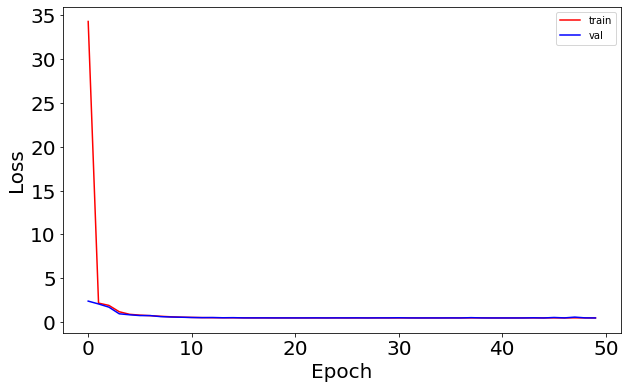

In [119]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(nn_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(nn_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [163]:
from keras.wrappers.scikit_learn import KerasRegressor

# create model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=5, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#hyper parameters
params = {'batch_size' : [32,64,128],
          'epochs' : [50,100,150]
         }

model = KerasRegressor(build_fn=create_model)

#initializing and fitting the model
grid = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=5,verbose=10)
grid.fit(x_train, y_train)
print('best score = ',grid.best_score_)
print('best params = ',grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:  3.7min remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.9min finished


Epoch 1/100
333/333 [==============================] - 1s 3ms/step - loss: 2.4233
Epoch 2/100
333/333 [==============================] - 1s 3ms/step - loss: 0.2843
Epoch 3/100
333/333 [==============================] - 1s 4ms/step - loss: 0.2688
Epoch 4/100
333/333 [==============================] - ETA: 0s - loss: 0.259 - 1s 3ms/step - loss: 0.2590
Epoch 5/100
333/333 [==============================] - 1s 4ms/step - loss: 0.2566
Epoch 6/100
333/333 [==============================] - 1s 4ms/step - loss: 0.2507
Epoch 7/100
333/333 [==============================] - 1s 4ms/step - loss: 0.2666
Epoch 8/100
333/333 [==============================] - 1s 3ms/step - loss: 0.2583
Epoch 9/100
333/333 [==============================] - 1s 3ms/step - loss: 0.2487
Epoch 10/100
333/333 [==============================] - 1s 4ms/step - loss: 0.2567
Epoch 11/100
333/333 [==============================] - 1s 4ms/step - loss: 0.2695
Epoch 12/100
333/333 [==============================] - 1s 3ms/step - lo

In [164]:
#Tuning dropout_rate and learning_rate hyper parameter
from keras.optimizers import Adam
# create model
def create_model(dropout_rate=0.1,learn_rate=0.1):
    model = Sequential()
    model.add(Dense(64, input_dim=5, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='uniform'))
    
    optimizer = Adam(lr=learn_rate)
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

#hyper parameters
params = {'dropout_rate' : [0.1, 0.2, 0.3, 0.4, 0.5],
          'learn_rate' : [0.001, 0.01, 0.1, 0.2, 0.3]
         }

model = KerasRegressor(build_fn=create_model)

#initializing and fitting the model
grid = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1,verbose=10)
grid.fit(x_train,y_train,batch_size=32, epochs=100, validation_split = 0.15)
print('best score = ',grid.best_score_)
print('best params = ',grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 33.1min finished


Epoch 1/100
283/283 [==============================] - 19s 67ms/step - loss: 1.9793 - val_loss: 0.3314
Epoch 2/100
283/283 [==============================] - 7s 24ms/step - loss: 0.4959 - val_loss: 0.2970
Epoch 3/100
283/283 [==============================] - 3s 10ms/step - loss: 0.4574 - val_loss: 0.2533
Epoch 4/100
283/283 [==============================] - 9s 31ms/step - loss: 0.4224 - val_loss: 0.2899
Epoch 5/100
283/283 [==============================] - 4s 14ms/step - loss: 0.4108 - val_loss: 0.2368
Epoch 6/100
283/283 [==============================] - 1s 5ms/step - loss: 0.4082 - val_loss: 0.2513
Epoch 7/100
283/283 [==============================] - 1s 5ms/step - loss: 0.4238 - val_loss: 0.2636
Epoch 8/100
283/283 [==============================] - 2s 6ms/step - loss: 0.4164 - val_loss: 0.2293
Epoch 9/100
283/283 [==============================] - 1s 5ms/step - loss: 0.3974 - val_loss: 0.2373
Epoch 10/100
283/283 [==============================] - 3s 11ms/step - loss: 0.4025 -

In [165]:
#Tuning number of neurons hyper parameter
# create model
def create_model(neurons=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=5, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#hyper parameters
params = {'neurons' : [1, 10, 20, 32, 64, 128]
         }

model = KerasRegressor(build_fn=create_model)

#initializing and fitting the model
grid = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, verbose=10)
grid.fit(x_train, y_train, batch_size=32, epochs=100, validation_split = 0.15)
print('best score = ',grid.best_score_)
print('best params = ',grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\Chinmaya\anaconda3\envs\tensf\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  9.2min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.7min finished


Epoch 1/100
283/283 [==============================] - 2s 7ms/step - loss: 2.1374 - val_loss: 0.3391
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 0.3074 - val_loss: 0.2538
Epoch 3/100
283/283 [==============================] - 1s 3ms/step - loss: 0.2769 - val_loss: 0.2651
Epoch 4/100
283/283 [==============================] - 1s 3ms/step - loss: 0.2654 - val_loss: 0.2721
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 0.2617 - val_loss: 0.2314
Epoch 6/100
283/283 [==============================] - 1s 3ms/step - loss: 0.2525 - val_loss: 0.2279
Epoch 7/100
283/283 [==============================] - 1s 4ms/step - loss: 0.2513 - val_loss: 0.2364
Epoch 8/100
283/283 [==============================] - 1s 4ms/step - loss: 0.2493 - val_loss: 0.2792
Epoch 9/100
283/283 [==============================] - 1s 4ms/step - loss: 0.2612 - val_loss: 0.2360
Epoch 10/100
283/283 [==============================] - 1s 4ms/step - loss: 0.2500 - val_lo

In [172]:
#selecting the hyper parameters from above analysis
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=5, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='uniform'))
    
    #optimizer = Adam(lr=0.001)
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = KerasRegressor(build_fn=create_model, batch_size=32, epochs=100)
model_history = model.fit(x_train, y_train ,validation_split = 0.15)
pred_nn = model.predict(x_test)
print('r square value is ',r2_score(y_test,pred_nn))
rmse_nn = np.sqrt(mean_squared_error(y_test,pred_nn))
print('RMSE = ',rmse_nn)

Epoch 1/100
283/283 [==============================] - 2s 7ms/step - loss: 3.1972 - val_loss: 0.4537
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 0.8232 - val_loss: 0.4818
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 0.7296 - val_loss: 0.3700
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 0.6861 - val_loss: 0.3059
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 0.6342 - val_loss: 0.2915
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 0.6080 - val_loss: 0.2606
Epoch 7/100
283/283 [==============================] - 1s 5ms/step - loss: 0.5870 - val_loss: 0.2438
Epoch 8/100
283/283 [==============================] - 1s 5ms/step - loss: 0.5581 - val_loss: 0.2582
Epoch 9/100
283/283 [==============================] - 1s 4ms/step - loss: 0.5717 - val_loss: 0.3265
Epoch 10/100
283/283 [==============================] - 1s 4ms/step - loss: 0.5568 - val_lo

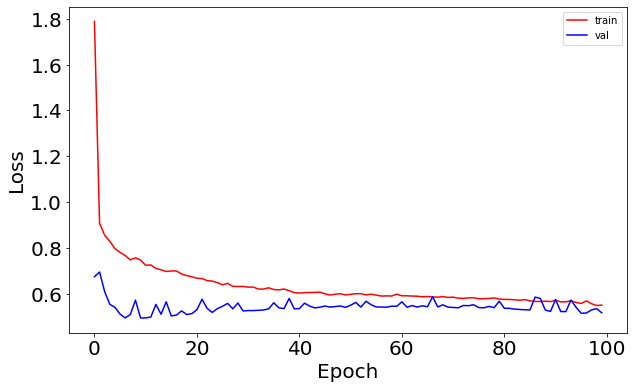

In [173]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [120]:
#consolidating the results
index = ['Linear Regression','Ridge','Lasso','KNN','Decision Tree','XG Boost','Random Forest','Neural Network']
index = pd.DataFrame(index,columns=['Algorithm'])
RMSE = [rmse_lin,rmse_rid,rmse_las,rmse_knn,rmse_decis,rmse_xgb,rmse_rand,rmse_nn]
RMSE = pd.DataFrame(RMSE,columns=['RMSE_score'])
pred = [pred_lin,pred_rid,pred_las,pred_knn,pred_decis,pred_xgb,pred_rand,pred_nn]
r2_scores = []
for i in pred:
    x = round(r2_score(y_test,i)*100,2)
    r2_scores.append(x)

r2 = pd.DataFrame(r2_scores,columns=['r2_score %'])

res = pd.concat([index,RMSE,r2],axis=1)
res

,Algorithm,RMSE_score,r2_score %
0,Linear Regression,0.439866,64.60
1,Ridge,0.440076,64.56
2,Lasso,0.440084,64.56
3,KNN,0.421026,67.56
4,Decision Tree,0.374180,74.38
5,XG Boost,0.314758,81.87
6,Random Forest,0.343176,78.45
7,Neural Network,0.480636,57.73


XG Boost is the best model with less loss

In [173]:
#creating pickle files for encoded values
import pickle
area_encod = open('area_encod','wb')
pickle.dump(encode_area_mapping,area_encod)
area_encod.close()

loc_encod = open('loc_encod','wb')
pickle.dump(encode_location_mapping,loc_encod)
loc_encod.close()

type_encod = open('type_encod','wb')
pickle.dump(encode_bedroom_mapping,type_encod)
type_encod.close()

In [174]:
#dumping the model file
model = open('model.pkl','wb')
pickle.dump(xgb,model)
model.close()

In [175]:
#loading the pickle files
model1 = pickle.load(open('model.pkl','rb'))
loca = pickle.load(open('loc_encod','rb'))
bed = pickle.load(open('type_encod','rb'))

In [155]:
#sample sqft value for prediction
s = np.log(1000)
s

6.907755278982137

In [167]:
#new data
m = {'area_type':[0], 'location':[200], 'no_bedroom':[1], 'total_sqft':[s], 'balcony':[1]}
data = pd.DataFrame(m)

In [168]:
#checking the dtype
data.dtypes

area_type       int64
location        int64
no_bedroom      int64
total_sqft    float64
balcony         int64
dtype: object

In [169]:
#predicting with model 
xx = model1.predict(data)
np.round(np.exp(xx),2)

array([54.31], dtype=float32)

In [181]:
#encoding the location name
z = 'AECS Layout'
for i in range(0,len(loca)):
    if(z==loca.index[i]):
        print(loca.encod_location[i])

0


In [179]:
loca.index[0]

'AECS Layout'

In [180]:
#encoding the no of bedroom 
a = '2 BHK'
for i in range(0,len(bed)):
    if(a==bed.index[i]):
        print(bed.Encoded_label[i])

2


In [307]:
ar

,encod_area
Area,
Built-up Area,0
Carpet Area,1
Plot Area,2
Super built-up Area,3
